### **Prédiction des retards des vols au départ de l'aéroport de JFK en fonction des conditions météorologiques ✈️**


<small> GHORAFI Manal • ED-DAZAZI Khawla • OUALY Ossama</small>

<small>Ce projet est réalisé dans le cadre du cours de Python pour la datascience à l'ENSAE pour l'année 2024-2025</small>

#### **Introduction**

<small> Le transport aérien tient une place centrale dans notre société moderne, reliant des régions du monde entier de manière rapide et efficace. Cependant, cette efficacité est régulièrement compromise par un problème persistant : **les retards de vols**. Ces retards affectent non seulement les passagers, mais aussi les compagnies aériennes et l'économie en général, entraînant des pertes de temps, des surcoûts et une insatisfaction générale.

Dans ce contexte, les aéroports sont confrontés à la nécessité de mieux comprendre et anticiper les causes des retards pour optimiser leurs opérations. Parmi les facteurs influençant les retards, **les conditions météorologiques** jouent un rôle crucial. Le brouillard, les vents violents, les précipitations ou les tempêtes peuvent perturber les horaires, réduire les capacités des pistes et accroître la congestion dans les aéroports. Par conséquent, intégrer l'impact des variables météorologiques dans les systèmes de gestion des vols est essentiel pour minimiser les perturbations et améliorer la planification. Ainsi, notre étude s’avère importante car elle propose de **prédire les probabilités de retard des vols au départ en tenant compte de l’impact des conditions météorologiques**.

En s’appuyant sur un ensemble de données combinant des informations sur les vols et des variables météorologiques (comme la température, les précipitations et la visibilité), cette étude vise à développer un modèle prédictif précis. Ce modèle peut être utilisé pour mieux planifier les opérations aéroportuaires, réduire les retards et, par conséquent, améliorer l'expérience des usagers.

Pour réaliser cette étude, nous nous concentrerons sur les vols de la compagnie aérienne **American Airlines** à départ de **l'aéroport international John F. Kennedy (JFK) à New York**, l'un des hubs les plus importants et les plus actifs au monde. Cet aéroport offre un contexte riche en données. Nous nous sommes intéressés aux vols de 

Pour identifier les facteurs influençant les retards des vols, nous avons mené une recherche préliminaire dans la littérature spécialisée, dont les références seront détaillées dans la partie **Sources** à la fin du rapport. Ces études mettent en évidence plusieurs types de variables pertinentes que nous avons essayé de regrouper en trois grandes catégories : 

**Variables liées aux vols**

<span style="margin-left: 50px;">**Heure de départ prévue :** Les retards peuvent être plus fréquents à certaines heures (par exemple, le soir).</span>

<span style="margin-left: 50px;">**Jour de la semaine :** Les week-ends ou jours de semaine peuvent influencer la ponctualité.</span>

<span style="margin-left: 50px;">**Saison ou mois de l’année :** Les conditions météorologiques ou les vacances peuvent affecter les vols.</span>


**Variables liées à la météo**

<span style="margin-left: 50px;">**Conditions météorologiques défavorables :** Des phénomènes tels qu'une faible visibilité et des vents forts sont connus pour être des facteurs susceptibles de provoquer des retards au décollage et de retarder le départ du vol de son parking.</span>

**Variables liées aux facteurs opérationnels**

<span style="margin-left: 50px;">**Problèmes techniques :** Des défaillances mécaniques ou des besoins de maintenance imprévus peuvent retarder le départ d'un vol.</span>

<span style="margin-left: 50px;">**Procédures de sécurité :** Des contrôles de sécurité renforcés ou des protocoles supplémentaires peuvent allonger le temps avant le décollage.</span>

**Variables liées au logistique aéroportuaire**

<span style="margin-left: 50px;">**Services au sol :** Des délais dans le ravitaillement en carburant, le chargement des bagages ou le dégivrage de l'appareil peuvent également contribuer aux retards.</span>

Afin de structurer cette étude, nous avons adopté une démarche en trois grandes étapes :

<span style="margin-left: 50px;">**Récupération et traitement des bases de données**</span>

<span style="margin-left: 70px;">**A. Base de Données vols**</span>

<span style="margin-left: 70px;">**B. Base de Données météo**</span>

<span style="margin-left: 70px;">**C. Fusion et construction de la base de données finale**</span>

<span style="margin-left: 50px;">**Analyse descriptive et représentation graphique**</span>

<span style="margin-left: 50px;">**Modélisation**</span>

<span style="margin-left: 70px;">**A. Régression Logistique**</span>

<span style="margin-left: 70px;">**B. Forêts Aléatoires**</span>

<span style="margin-left: 70px;">**C. Comparaison entre les deux modèles**</span>

 </small>



#### **Récupération et Traitement des données**

<span style="margin-left: 20px;"><span style="color:darkmagenta;">**A. Récupération et Traitement des données sur les vols**</span></span>


<span style="margin-left: 30px;"><span style="color:olive;">**1. Récupération des données sur les vols**</span></span>

<small>Dans le cadre de notre projet, nous avons tenté de rendre reproductible l'étape de récupération des données sur les vols à partir du site [Transtats BTS](https://www.transtats.bts.gov/ONTIME/Departures.aspx) à l’aide de Python, en utilisant la bibliothèque <span style="color:darkorange;">**requests**</span>. Cela aurait permis d'automatiser le téléchargement des données pour éviter une intervention manuelle. Cependant, cette démarche a échoué pour plusieurs raisons techniques, que nous allons détailler ici, accompagnées des preuves issues de l’**inspection des requêtes <span style="color:darkorange;">HTTP**</span> effectuées par le site.


Sur le site Transtats BTS, pour télécharger les données, nous avons choisi les informations spécifiques que nous souhaitons inclure dans le fichier (par exemple, heure de départ, heure d’arrivée, etc.). Il est possible de restreindre les données à un ou plusieurs aéroports spécifiques comme il est possible de restreindre les données à une ou plusieurs compagnies aériennes, ainsi nous avons choisi l'aéroport <span style="color:darkorange;">**John F.Kennedy**</span>, pour la compagnie aérienne <span style="color:darkorange;">**American Airlines**</span> pour les raisons déjà invoquées en introduction. Toujours sur le site, il faut indiquer la période souhaitée (les jours, les mois et les années). Le bouton <span style="color:darkorange;">**Submit**</span> envoie une requette pour préparer la base de données. Enfin, nous avons cliqué sur le bouton <span style="color:darkorange;">**« EXCEL»**</span>, ce qui génère **un fichier Excel** contenant les données demandées.  

Ce processus implique plusieurs interactions qui ne sont pas facilement reproduites dans un script Python classique :

<span style="margin-left: 50px;">Lorsque nous effectuons des choix sur le site, ces actions déclenchent des requêtes en arrière-plan au serveur. Les paramètres nécessaires pour effectuer ces requêtes ne sont pas visibles directement dans le <span style="color:darkorange;">**code HTML**</span> de la page, car ils sont générés dynamiquement par des **scripts JavaScript**. Avec Python <span style="color:darkorange;">**requests**</span>, nous ne pouvons pas exécuter ce JavaScript, ce qui signifie que les paramètres nécessaires ne peuvent pas être reproduits automatiquement.</span>

<span style="margin-left: 50px;">En utilisant les outils de développement du navigateur <span style="color:darkorange;">**(F12 > Réseau)**</span>, nous avons analysé le comportement du site lors du téléchargement des données :  

1. **Requête de téléchargement (HTTP POST)**
   La requête générée lorsque nous cliquons sur « Excel »(pour télécharger la base de données) ressemble à ceci :  
   ```
   POST https://www.transtats.bts.gov/ONTIME/Departures.aspx
   ```
2. **En-têtes HTTP dynamiques**
   Les en-têtes envoyés contiennent des informations obligatoires pour valider la requête, notamment :  
   - **Cookies de session** : Exemple  
     ```
     ASP.NET_SessionId=odhxuf2j141fh1ttlsefazhl
     ```
   - **Référent (`Referer`)** :  
     ```
     https://www.transtats.bts.gov/ONTIME/Departures.aspx
     ```
   - **Jetons de validation dynamiques (`VIEWSTATE`)** :  
     Ces jetons, invisibles dans le code initial de la page, sont générés par JavaScript et transmis avec la **requête POST**.  

3. **Dépendance à JavaScript**  
   L’analyse du bouton de téléchargement montre qu’il utilise une fonction JavaScript spécifique :  
   ```html
   <a id="DL_Excel" class="btsfont" href="javascript:__doPostBack('DL_Excel','')" style="font-size:10pt;">Excel</a>
   ```
   Cette fonction génère les paramètres de la requête, mais elle ne peut être exécutée que dans un navigateur. Python, sans navigateur intégré, ne peut pas simuler cette action.

 Pour toutes ces raisons, <span style="color:darkorange;">**Python requests**</span> échoue.
 
Compte tenu de ces limitations, nous avons opté pour la méthode suivante :  
1. **Téléchargement manuel** :  
   - Nous accédons au site, effectuons les sélections nécessaires (variables, aéroports, compagnies, période) et téléchargeons le fichier Excel manuellement.  
2. **Traitement Python des données** :  
   - Une fois le fichier téléchargé, nous utilisons Python pour l’importer et l’analyser.  

Bien que cette solution ne soit pas entièrement automatisée, elle garantit l’accès aux données sans contourner les protections du site.
</small>

<span style="margin-left: 30px;"><span style="color:olive;">**2. Traitement des données sur les vols**</span></span>

<span style="color:darkcyan;">**Téléchargement des bibliothèques**</span>

In [79]:
import pandas as pd
!pip install openpyxl
from sklearn.preprocessing import LabelEncoder
import requests
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

<span style="color:darkcyan;">**Importation de la base de données et création du data frame**</span>

In [37]:
df1 = pd.read_excel('/home/onyxia/work/Projet_Python-pour-la-data-science/data/Detailed_Statistics_Departures.xlsx')
#df1 = pd.read_excel('data/Detailed_Statistics_Departures.xlsx')

In [38]:
# Afficher les 5 premières lignes pour vérifier
df1.head(5)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,2020-01-01 00:00:00,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0
1,AA,2020-01-01 00:00:00,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0
2,AA,2020-01-01 00:00:00,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0
3,AA,2020-01-01 00:00:00,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0
4,AA,2020-01-01 00:00:00,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0


<span style="color:darkcyan;">**Lecture des variables de notre base de données**</span>
<small>
- **Carrier Code** : Code abrégé de la compagnie aérienne. Cette variable prend toujours dans notre base la valeur <span style="color:orange;">**"AA"**</span> qui renvoie à <span style="color:orange;">**American Airlines**</span> vue que lors de notre récupération de la base de données, nous n'avons sélectionné que cette compagnie aérienne.

- **Date (MM/DD/YYYY)** : Date du vol au format mois/jour/année. Lors de notre sélection, nous avons choisit la période allant du <span style="color:orange;">**01 Janvier 2020**</span> au <span style="color:orange;">**31 Décembre 2024**</span>.

- **Flight Number** : Numéro unique du vol, souvent combiné avec le **Carrier Code** pour identifier un vol spécifique.

- **Tail Number** : Numéro d'identification unique de l'avion utilisé pour le vol .

- **Destination Airport** : Code de l'aéroport de destination.

- **Scheduled Departure Time** : Heure prévue de départ du vol, en général en heure locale.

- **Actual Departure Time** : Heure réelle à laquelle l'avion a quitté la porte d'embarquement.

- **Scheduled Elapsed Time (Minutes)** : Durée prévue du vol en minutes (inclut le temps de vol et le temps prévu au sol, comme le taxiing).

- **Actual Elapsed Time (Minutes)** : Durée réelle du vol en minutes, mesurée de la porte d'embarquement à la porte d'arrivée.

- **Departure Delay (Minutes)** : Retard au départ en minutes, calculé comme :
  <span style="color:orange;">**Actual Departure Time−Scheduled Departure Time**</span> .

- **Wheels-off Time** : Heure à laquelle l'avion a effectivement quitté le sol (lorsque les roues quittent la piste).

- **Taxi-Out Time (Minutes)** : Temps écoulé entre le moment où l'avion quitte la porte d'embarquement et le moment où il décolle (roulement au sol).

- **Delay Carrier (Minutes)** : Retard causé par la compagnie aérienne. Cette variable nous indique si jamais il y avait des problèmes internes à la compagnie aérienne (ex. maintenance, équipage).

- **Delay Weather (Minutes)** : Retard causé par des conditions météorologiques défavorables.

- **Delay National Aviation System (Minutes)** : Retard lié à la gestion nationale de l'aviation, comme les restrictions de trafic aérien ou la gestion des aéroports. Cette variable sert comme indicatrice de la présence d'un problème au niveau des logistiques de l'aéroport.

- **Delay Security (Minutes)** : Retard causé par des problèmes de sécurité (ex. contrôles prolongés).

- **Delay Late Aircraft Arrival (Minutes)** : Retard causé par l’arrivée tardive de l’avion précédemment affecté à ce vol.
</small>

<span style="color:darkcyan;">**Detection et traitement des valeurs manquantes**</span>

In [39]:
# Vérifier si le DataFrame contient des valeurs manquantes
df1.isnull().values.any()

True

In [40]:
# la sortie np.True indique la présence des valeurs manquantes dans notre base de données
# Nombre de valeurs manquantes par colonne
df1.isnull().sum()

Carrier Code                                  1
Date (MM/DD/YYYY)                             2
Flight Number                                 2
Tail Number                                 228
Destination Airport                           2
Scheduled departure time                      2
Actual departure time                         2
Scheduled elapsed time (Minutes)              2
Actual elapsed time (Minutes)                 2
Departure delay (Minutes)                     2
Wheels-off time                               2
Taxi-Out time (Minutes)                       2
Delay Carrier (Minutes)                       2
Delay Weather (Minutes)                       2
Delay National Aviation System (Minutes)      2
Delay Security (Minutes)                      2
Delay Late Aircraft Arrival (Minutes)         2
dtype: int64

In [41]:
#Afficher les lignes où les variables(sauf Tail Number) ont certaines valeurs manquantes
val_manq=df1.drop(columns=['Tail Number'])
print(df1[val_manq.isnull().any(axis=1)])

                                      Carrier Code Date (MM/DD/YYYY)  \
57410                                          NaN               NaN   
57411  SOURCE: Bureau of Transportation Statistics               NaN   

       Flight Number Tail Number Destination Airport Scheduled departure time  \
57410            NaN         NaN                 NaN                      NaN   
57411            NaN         NaN                 NaN                      NaN   

      Actual departure time  Scheduled elapsed time (Minutes)  \
57410                   NaN                               NaN   
57411                   NaN                               NaN   

       Actual elapsed time (Minutes)  Departure delay (Minutes)  \
57410                            NaN                        NaN   
57411                            NaN                        NaN   

      Wheels-off time  Taxi-Out time (Minutes)  Delay Carrier (Minutes)  \
57410             NaN                      NaN                    

<span style="color:lightpink;">**Commentaire de la sortie**</span>

<small>Les deux dernières lignes de notre fichier excel correspondent à la source des données, causant la présence des deux valeurs manquantes (détecter lors du test sur les valeurs manquantes) sur chaque colonne de notre base de données. Ainsi, **on peut les supprimer**. </small>

<small>La seule variable qui présente d'autres valeurs manquantes est <span style="color:orange;">**Tail Number**</span>. Cependant il ne s'agit pas d'une variable explicative dans notre modèle, ainsi ces valeurs manquantes ne nécessitent aucun traitement et ont peut garder ces lignes dans notre base de données.</small>

In [42]:
# Identifier les index des deux dernières lignes
ind= df1.index[-2:]

# Supprimer ces lignes
df1 = df1.drop(ind)

In [43]:
# Vérification si la suppression a été réussie 
print(df1)

      Carrier Code    Date (MM/DD/YYYY)  Flight Number Tail Number  \
0               AA  2020-01-01 00:00:00            1.0      N110AN   
1               AA  2020-01-01 00:00:00            3.0      N111ZM   
2               AA  2020-01-01 00:00:00          111.0      N663AW   
3               AA  2020-01-01 00:00:00          117.0      N113AN   
4               AA  2020-01-01 00:00:00          179.0      N103NN   
...            ...                  ...            ...         ...   
57405           AA           12/31/2023         2772.0      N989AN   
57406           AA           12/31/2023         2786.0      N326RP   
57407           AA           12/31/2023         2813.0      N716UW   
57408           AA           12/31/2023         2819.0      N961AN   
57409           AA           12/31/2023         2829.0      N327SK   

      Destination Airport Scheduled departure time Actual departure time  \
0                     LAX                 07:30:00              07:30:00   
1      

<span style="color:lightpink;">**Commentaire de la sortie**</span>

<small>Les deux dernières lignes de notre fichier excel correspondent à la source des données, ne figurent plus dans notre data frame, ce qui indique qu'elles ont été supprimées avec succès. </small>

<span style="color:darkcyan;">**Extraction de la date du jour du vol de la colonne Date (MM/DD/YYYY)**</span>

<small>D'après la sortie du code précédent, nous pouvons clairement voir que la colonne **Date (MM/DD/YYYY)** ne contient pas uniquement la date du jour du vol mais aussi la chaîne de caractère **00:00:00** qui renvoie à **l'heure du début d'un jour**.</small>


In [44]:
# Extraire uniquement la date de la colonne Date (MM/DD/YYYY) 
df1['Date (MM/DD/YYYY)'] = pd.to_datetime(df1['Date (MM/DD/YYYY)'], format='%m/%d/%Y').dt.date

#Renommer la colonne Date (MM/DD/YYYY) en Date 
df1.rename(columns={'Date (MM/DD/YYYY)': 'Date'}, inplace=True)


In [45]:
# Afficher le dataframe
df1.head(5)

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,2020-01-01,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0
1,AA,2020-01-01,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0
2,AA,2020-01-01,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0
3,AA,2020-01-01,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0
4,AA,2020-01-01,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0


<span style="color:darkcyan;">**Création de la colonne Weekday_Flight**</span>

<small>Nous aimerions aussi voir si **le retard d'un vol peut être lié au jour de la semaine où le vol aura lieu**. Pour cela, il est nécessaire de créer une colonne contenant le jour de la semaine **(Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday)** correspondant à chaque vol de notre data frame.
</small>


In [46]:
# Convertir la colonne 'Date' en format datetime 
df1['Date'] = pd.to_datetime(df1['Date'])
# Créer la colonne Weekday_Flight avec les jours de la semaine correspondant aux dates des vols
df1['Weekday_Flight'] = df1['Date'].dt.day_name()


In [47]:
# Afficher Date et Weekday_Flight
df1[['Date','Weekday_Flight']]

,Date,Weekday_Flight
0,2020-01-01,Wednesday
1,2020-01-01,Wednesday
2,2020-01-01,Wednesday
3,2020-01-01,Wednesday
4,2020-01-01,Wednesday
...,...,...
57405,2023-12-31,Sunday
57406,2023-12-31,Sunday
57407,2023-12-31,Sunday
57408,2023-12-31,Sunday


<span style="color:darkcyan;">**Création de la colonne Season**</span>

<small> La variable **"saison"** peut influencer les retards des vols en raison des **variations météorologiques** et des **volumes de trafic** spécifiques à chaque période de l'année. Par exemple, l’hiver apporte souvent des conditions difficiles comme la neige ou le brouillard, tandis que l’été, marqué par un trafic élevé, peut être perturbé par des orages ou des surcharges aéroportuaires. Ainsi, en tenant compte des saisons, il devient possible de mieux comprendre et anticiper les facteurs contribuant aux retards. </small>


In [48]:
# Définir une fonction qui détermine pour une date données la saison correspondante
def get_season(date):
    year = date.year
    if date >= pd.Timestamp(year=year, month=3, day=21) and date < pd.Timestamp(year=year, month=6, day=21):
        return 'Printemps'
    elif date >= pd.Timestamp(year=year, month=6, day=21) and date < pd.Timestamp(year=year, month=9, day=23):
        return 'Été'
    elif date >= pd.Timestamp(year=year, month=9, day=23) and date < pd.Timestamp(year=year, month=12, day=21):
        return 'Automne'
    else:
        return 'Hiver'

In [49]:
# Convertir la colonne Date en datetime 
df1['Date'] = pd.to_datetime(df1['Date'])

# Appliquer la fonction sur la colonne Date du dataframe
df1['Season'] = df1['Date'].apply(get_season)

In [50]:

# Afficher  des observations aléatoires du DataFrame
print(df1.Season[1000:1010])

print(df1.Season[2000:2010])


1000    Printemps
1001    Printemps
1002    Printemps
1003    Printemps
1004    Printemps
1005    Printemps
1006    Printemps
1007    Printemps
1008    Printemps
1009    Printemps
Name: Season, dtype: object
2000    Automne
2001    Automne
2002    Automne
2003    Automne
2004    Automne
2005    Automne
2006    Automne
2007    Automne
2008    Automne
2009    Automne
Name: Season, dtype: object



<span style="color:darkcyan;">**Création de la colonne Period_Day**</span>


In [51]:
# Définir une fonction pour attribuer la période de la journée
def definir_periode(heure):
    if heure >= pd.to_datetime('06:00', format='%H:%M').time() and heure < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Matin'
    elif heure >= pd.to_datetime('12:00', format='%H:%M').time() and heure < pd.to_datetime('18:00', format='%H:%M').time():
        return 'Après-midi'
    else:
        return 'Soir'

In [52]:
# Convertir la colonne en type datetime
df1['Scheduled departure time'] = pd.to_datetime(df1['Scheduled departure time'], format='%H:%M:%S')

# Appliquer la fonction pour créer une nouvelle colonne
df1['Period_Day'] = df1['Scheduled departure time'].dt.time.apply(definir_periode)

# Reconvertir les colonnes "Scheduled departure time" et "Actual departure time" pour ne garder que l'heure 
df1['Scheduled departure time'] = df1['Scheduled departure time'].dt.time

In [53]:
# Afficher les colonnes Period_Day et Scheduled departure time
df1[['Scheduled departure time','Period_Day']]

,Scheduled departure time,Period_Day
0,07:30:00,Matin
1,12:30:00,Après-midi
2,12:00:00,Après-midi
3,19:30:00,Soir
4,10:30:00,Matin
...,...,...
57405,17:29:00,Après-midi
57406,12:30:00,Après-midi
57407,06:59:00,Matin
57408,08:59:00,Matin


<span style="color:darkcyan;">**Création de notre variable cible Y=Delay**</span>

<small> Le **retard d'un vol au départ** se définit comme **l'écart entre l'heure de départ ou d'arrivée prévue d'un vol, telle qu'indiquée dans le programme, et l'heure réelle à laquelle le vol décolle**.
</small>


In [54]:
# Convertir les colonnes "Scheduled departure time" et "Actual departure time" en objets datetime
df1['Scheduled departure time'] = pd.to_datetime(df1['Scheduled departure time'], format='%H:%M:%S')
df1['Actual departure time'] = pd.to_datetime(df1['Actual departure time'], format='%H:%M:%S')

# Création de la variable cible "Retard en calculant la différence en minutes et appliquer la condition
df1['Retard'] = ((df1['Actual departure time'] - df1['Scheduled departure time']).dt.total_seconds() / 60 > 0).astype(int)

# Reconvertir les colonnes "Scheduled departure time" et "Actual departure time" pour ne garder que l'heure 
df1['Scheduled departure time'] = df1['Scheduled departure time'].dt.time
df1['Actual departure time'] = df1['Actual departure time'].dt.time

# Afficher les colonnes "Actual departure time", "Scheduled departure time" et "Retard"
print(df1[['Scheduled departure time', 'Actual departure time', 'Retard']])

      Scheduled departure time Actual departure time  Retard
0                     07:30:00              07:30:00       0
1                     12:30:00              12:24:00       0
2                     12:00:00              13:11:00       1
3                     19:30:00              19:26:00       0
4                     10:30:00              10:25:00       0
...                        ...                   ...     ...
57405                 17:29:00              17:25:00       0
57406                 12:30:00              12:26:00       0
57407                 06:59:00              06:57:00       0
57408                 08:59:00              08:53:00       0
57409                 12:59:00              12:57:00       0

[57410 rows x 3 columns]


<span style="color:darkcyan;">**Encodage des variables qualitatives**</span>

<small>Pour pouvoir réaliser la suite de notre projet, nous aurons besoin d'encoder les variables qualitatives de notre data frame.</small>

In [55]:
!pip install scikit-learn
import sklearn
from sklearn.preprocessing import LabelEncoder

<span style="color:lightpink;">**Encodage de la variable Weekday_Flight**</span>

In [56]:
# Initialiser l'encodeur
label_encoder = LabelEncoder()

# Encoder de la variable Weekday_Flight
df1['Weekday_Flight_encoded'] = label_encoder.fit_transform(df1['Weekday_Flight'])

# Récupérer les modalités de Weekday_Flight et leurs codes correspondant dans la variable Weekday_Flight_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher les colonnes Weekday_Flight et Weekday_Flight_encoded
print(df1[['Weekday_Flight','Weekday_Flight_encoded']])


Modalités et leurs codes : [('Friday', 0), ('Monday', 1), ('Saturday', 2), ('Sunday', 3), ('Thursday', 4), ('Tuesday', 5), ('Wednesday', 6)]
      Weekday_Flight  Weekday_Flight_encoded
0          Wednesday                       6
1          Wednesday                       6
2          Wednesday                       6
3          Wednesday                       6
4          Wednesday                       6
...              ...                     ...
57405         Sunday                       3
57406         Sunday                       3
57407         Sunday                       3
57408         Sunday                       3
57409         Sunday                       3

[57410 rows x 2 columns]


<span style="color:lightpink;">**Encodage de la variable Season**</span>


In [57]:
# Initialiser l'encodeur
label_encoder = LabelEncoder()


# Encoder de la variable Season
df1['Season_encoded'] = label_encoder.fit_transform(df1['Season'])

# Récupérer les modalités de Season et leurs codes correspondant dans la variable Season_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher des valeurs aléatoires de Season et Season_encoded
print(df1[['Season', 'Season_encoded']][1000:1005])
print(df1[['Season', 'Season_encoded']][2000:2005])
print(df1[['Season', 'Season_encoded']][3000:3005])


Modalités et leurs codes : [('Automne', 0), ('Hiver', 1), ('Printemps', 2), ('Été', 3)]
         Season  Season_encoded
1000  Printemps               2
1001  Printemps               2
1002  Printemps               2
1003  Printemps               2
1004  Printemps               2
       Season  Season_encoded
2000  Automne               0
2001  Automne               0
2002  Automne               0
2003  Automne               0
2004  Automne               0
     Season  Season_encoded
3000  Hiver               1
3001  Hiver               1
3002  Hiver               1
3003  Hiver               1
3004  Hiver               1


<span style="color:lightpink;">**Encodage de la variable Period_Day**</span>


In [58]:
# Initialiser l'encodeur
label_encoder = LabelEncoder()

# Encoder de la variable Period_Day
df1['Period_Day_encoded'] = label_encoder.fit_transform(df1['Period_Day'])

# Récupérer les modalités de Period_Day et leurs codes correspondant dans la variable Period_Day_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher les colonnes Period_Day et Period_Day_encoded
print(df1[['Period_Day','Period_Day_encoded']])


Modalités et leurs codes : [('Après-midi', 0), ('Matin', 1), ('Soir', 2)]
       Period_Day  Period_Day_encoded
0           Matin                   1
1      Après-midi                   0
2      Après-midi                   0
3            Soir                   2
4           Matin                   1
...           ...                 ...
57405  Après-midi                   0
57406  Après-midi                   0
57407       Matin                   1
57408       Matin                   1
57409  Après-midi                   0

[57410 rows x 2 columns]


<span style="color:lightpink;">**Encodage de la variable Destination Airport**</span>


In [59]:
# Initialiser l'encodeur
label_encoder = LabelEncoder()

# Encoder de la variable Destination Airport
df1['Destination_encoded'] = label_encoder.fit_transform(df1['Destination Airport'])

# Récupérer les modalités de Destination Airport et leurs codes correspondant dans la variable Destination_encoded
modalites_et_codes1 = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes1)

#Afficher les colonnes Destination Airport et Destination_encoded
print(df1[['Destination Airport','Destination_encoded']])


Modalités et leurs codes : [('AUS', 0), ('BOS', 1), ('CLT', 2), ('DCA', 3), ('DFW', 4), ('EGE', 5), ('FLL', 6), ('JAC', 7), ('LAS', 8), ('LAX', 9), ('MIA', 10), ('ORD', 11), ('PHX', 12), ('RDU', 13), ('SAN', 14), ('SAT', 15), ('SFO', 16), ('SNA', 17), ('STT', 18)]
      Destination Airport  Destination_encoded
0                     LAX                    9
1                     LAX                    9
2                     CLT                    2
3                     LAX                    9
4                     SFO                   16
...                   ...                  ...
57405                 AUS                    0
57406                 MIA                   10
57407                 AUS                    0
57408                 ORD                   11
57409                 PHX                   12

[57410 rows x 2 columns]


<span style="color:darkcyan;">**Suppression des variables non porteurs de sens à notre problématique**</span>

<small>Nous avons choisi de ne pas inclure certaines variables dans notre modélisation des retards des vols afin d'**améliorer la pertinence et l'efficacité de notre analyse**. Les variables supprimées, telles que <span style="color:orange;">"Carrier Code"</span>, <span style="color:orange;">**"Flight Number"**</span> et <span style="color:orange;">**"Tail Number"**</span>, sont des identifiants spécifiques qui n'apportent pas de valeur explicative directe. De même, <span style="color:orange;">**"Scheduled elapsed time (Minutes)"**</span> et <span style="color:orange;">**"Actual elapsed time (Minutes)"**</span> sont redondantes avec d'autres variables telles que les retards catégorisés(les Delay Variables) et peuvent introduire de la multicolinéarité. Les horaires spécifiques, comme <span style="color:orange;">**"Scheduled departure time"**</span> et <span style="color:orange;">**"Actual departure time"**</span> , ont été remplacés par des variables dérivées comme <span style="color:orange;">**"Retard"**</span> et <span style="color:orange;">**"Period_Day"**</span> , qui capturent des informations plus exploitables et plus pertinentes. Enfin, la variable <span style="color:orange;">**"Departure delay (Minutes)"**</span> a été écartée car elle est directement liée à la cible et pourrait biaiser le modèle. Cette sélection vise à réduire la complexité, à limiter les redondances et à garantir une meilleure interprétation des résultats tout en conservant les variables essentielles au phénomène étudié.

La variable <span style="color:orange;">**"Date"**</span> sera aussi écartée de notre modèle a été remplacés par des variables dérivées comme **"Season"** et **"Weekday_Flight"**, qui capturent des informations temporelles plus pertinentes. Cependant, nous la garderons à ce stade parce qu'elle nous servira pour faire la jointure avec la base de données météorologiques.
</small>

In [60]:
df1.drop(columns=["Carrier Code","Flight Number","Tail Number",
"Scheduled elapsed time (Minutes)","Actual elapsed time (Minutes)","Actual departure time"], inplace=True)

<span style="margin-left: 20px;"><span style="color:darkmagenta;">**B. Récupération et Traitement des données météorologiques**</span></span>

<span style="margin-left: 30px;"><span style="color:olive;">**1. Récupération des données météorologiques**</span></span>

<small>Pour récupérer les données météorologiques, nous utilisons l'API Open-Meteo. Pour rendre reproductible et automatique l'étape de récupération des données, nous utilisons la bibliothèque <span style="color:darkorange;">**requests**</span>.<small>


In [61]:
import requests

In [62]:
# URL de l'API Open-Meteo avec les paramètres requis
url="https://archive-api.open-meteo.com/v1/archive?latitude=40.64&longitude=-73.78&start_date=2020-11-01&end_date=2024-11-01&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm&format=csv"

# Envoi de la requête GET
response = requests.get(url)

# Vérification de la réponse
if response.status_code == 200: #la requete a réussi
    with open("weather_data.csv", "wb") as file: #On enregistre le contenu dans un fichier CSV
        file.write(response.content)
    print("Téléchargement terminé ! Les données sont enregistrées dans 'weather_data.csv'.")
else:
    print(f"Erreur lors de la requête : {response.status_code}")

Téléchargement terminé ! Les données sont enregistrées dans 'weather_data.csv'.


In [63]:
#on charge le fichier csv en ignorant les 3 premières lignes
df2=pd.read_csv("weather_data.csv", skiprows=3)

In [64]:
df2['time'] = pd.to_datetime(df2['time'])

In [65]:
df2['time']=pd.to_datetime(df2['time'], format="format='%m/%d/%Y")

In [66]:
df2.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2020-11-01 00:00:00,7.4,64,1.1,4.1,0.0,0.0,0.0,0.0,3,...,191,19.8,8.0,9.9,15.6,19.7,0.385,0.392,0.276,0.327
1,2020-11-01 01:00:00,7.3,67,1.6,4.2,0.0,0.0,0.0,0.0,3,...,193,15.1,8.0,9.9,15.5,19.7,0.384,0.391,0.276,0.327
2,2020-11-01 02:00:00,7.9,67,2.1,4.7,0.0,0.0,0.0,0.0,3,...,189,15.5,8.0,9.8,15.5,19.7,0.384,0.390,0.276,0.327
3,2020-11-01 03:00:00,8.7,64,2.2,4.7,0.0,0.0,0.0,0.0,2,...,187,24.1,8.2,9.8,15.5,19.7,0.383,0.390,0.276,0.327
4,2020-11-01 04:00:00,9.0,64,2.4,4.9,0.0,0.0,0.0,0.0,3,...,208,28.4,8.4,9.8,15.4,19.7,0.383,0.389,0.277,0.327


<span style="color:darkcyan;">**Lecture des variables de notre base de données**</span>

<small>

- **temperature_2m (°C)** : Température de l'air à 2 mètres au-dessus du sol (en °C).

- **relative_humidity_2m (%)** : Humidité relative à 2 mètres au-dessus du sol (en %).

- **dew_point_2m (°C)** : Température du point de rosée à 2 mètres au-dessus du sol (en °C).

- **apparent_temperature (°C)** : Température apparente, ou température ressentie, qui combine les effets du vent, de l'humidité relative et de la radiation solaire (en °C).

- **precipitation (mm)** : Précipitations totales (pluie, averses, neige) de l'heure précédente, exprimées en millimètres.

- **rain (mm)** : Précipitations liquides de l'heure précédente (pluie), exprimées en millimètres.

- **snowfall (cm)** : Quantité de neige tombée lors de l'heure précédente, exprimée en centimètres.

- **snow_depth (m)** : Profondeur de la neige au sol, exprimée en mètres.

- **weather_code (wmo code)** : Code météorologique selon l'Organisation mondiale de la météorologie (OMM), qui représente les conditions météorologiques à partir d'une analyse de la couverture nuageuse, des précipitations et de la neige.

- **pressure_msl (hPa)** : Pression atmosphérique réduite au niveau de la mer (en hPa), utilisée en météorologie pour donner une pression standardisée au niveau de la mer.

- **surface_pressure (hPa)** : Pression atmosphérique à la surface, mesurée directement en hPa.

- **cloud_cover (%)** : Couverture nuageuse totale en pourcentage.

- **cloud_cover_low (%)** : Couverture nuageuse basse (nuages et brouillard à moins de 2 km d'altitude), en pourcentage.

- **cloud_cover_mid (%)** : Couverture nuageuse moyenne (nuages de 2 à 6 km d'altitude), en pourcentage.

- **cloud_cover_high (%)** : Couverture nuageuse haute (nuages au-dessus de 6 km d'altitude), en pourcentage.

- **et0_fao_evapotranspiration (mm)** : Evapotranspiration de référence (ET₀) selon la méthode FAO-56 Penman-Monteith, calculée à partir de la température, de la vitesse du vent, de l'humidité et de la radiation solaire. Elle estime les besoins en irrigation pour les plantes dans un champ bien arrosé, exprimée en millimètres.

- **vapour_pressure_deficit (kPa)** : Déficit de pression de vapeur (VPD) en kilopascals (kPa). Ce paramètre indique la capacité de l'air à absorber la vapeur d'eau. Un VPD élevé (supérieur à 1,6 kPa) augmente la transpiration des plantes, tandis qu'un faible VPD (inférieur à 0,4 kPa) la diminue.

- **wind_speed_10m (km/h)** : Vitesse du vent à 10 mètres au-dessus du sol, exprimée en kilomètres par heure (km/h).

- **wind_speed_100m (km/h)** : Vitesse du vent à 100 mètres au-dessus du sol, exprimée en kilomètres par heure (km/h).

- **wind_direction_10m (°)** : Direction du vent à 10 mètres au-dessus du sol, exprimée en degrés (°).

- **wind_direction_100m (°)** : Direction du vent à 100 mètres au-dessus du sol, exprimée en degrés (°).

- **wind_gusts_10m (km/h)** : Rafales de vent à 10 mètres au-dessus du sol, exprimées en kilomètres par heure (km/h).

- **soil_temperature_0_to_7cm (°C)** : Température moyenne du sol entre 0 et 7 cm de profondeur, exprimée en °C.

- **soil_temperature_7_to_28cm (°C)** : Température moyenne du sol entre 7 et 28 cm de profondeur, exprimée en °C.

- **soil_temperature_28_to_100cm (°C)** : Température moyenne du sol entre 28 et 100 cm de profondeur, exprimée en °C.

- **soil_temperature_100_to_255cm (°C)** : Température moyenne du sol entre 100 et 255 cm de profondeur, exprimée en °C.

- **soil_moisture_0_to_7cm (m³/m³)** : Humidité du sol entre 0 et 7 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).

- **soil_moisture_7_to_28cm (m³/m³)** : Humidité du sol entre 7 et 28 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).

- **soil_moisture_28_to_100cm (m³/m³)** : Humidité du sol entre 28 et 100 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).

- **soil_moisture_100_to_255cm (m³/m³)** : Humidité du sol entre 100 et 255 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).

<span style="color:darkcyan;">**Sélection des variables météorologiques**</span>

<small>
Nous supprimons les variables non pertinentes pour expliquer les retards des vols. Par exemple, la variable <span style="color:darkorange;">apparent_temperature</span> est une combinaison des variables temperature_2m et relative_humidity_2m. En l'incluant, nous avons une redondance d'informations qui n'apporte pas de valeur ajoutée supplémentaire pour l'analyse.
Les variables <span style="color:darkorange;">snow</span> et <span style="color:darkorange;">rain</span> représentent respectivement les précipitations sous forme de neige et de pluie. Cependant, nous avons une variable precipitation qui regroupe déjà ces deux types de précipitations, ainsi que les averses. Pour éviter la duplication des données, il est plus judicieux de conserver precipitation et de supprimer snow et rain.

La variable <span style="color:darkorange;">wind_speed_100m</span> représente la vitesse du vent à 100 mètres. Le niveau standard est de 10 mètres. Ainsi, nous avons choisi de garder la variable wind_speed_10m.

Nous conservons la variable cloud_cover qui représente la couverture nuageuse totale, car elle affecte directement la visibilité et la sécurité des vols (notamment pour les décollages et les atterissages). Cependant, nous supprimons les variables <span style="color:darkorange;">cloud_cover_mid</span> et <span style="color:darkorange;">cloud_cover_high</span> qui représentent la couverture nuageuse moyenne et haute. Ces variables impactent moins directement les conditions qui influencent les retards. De plus, elles peuvent etre redondantes par rapport à la variable cloud_cover. Nous avons choisi de garder la variable cloud_cover_low qui peut etre associé à la formation de brouillard ou de nuages bas.

Nous supprimons les variables qui représentent la température du sol à différentes profondeurs (<span style="color:darkorange;">soil_moistures</span>), car elles n'ont pas d'impact direct sur les phénomènes météorologiques affectant les retards de vols.

Nous choisissons de garder la variable wind_direction_10m et de supprimer <span style="color:darkorange;">wind_direction_100m</span>. La direction du vent peut affecter les décollages et atterrissages car les avions ont besoin d'un vent favorable (vent de face) pour effectuer un décollage ou un atterissage en toute sécurité. <small>

In [67]:
df2.drop(columns=["soil_moisture_0_to_7cm (m³/m³)", "soil_moisture_7_to_28cm (m³/m³)", 
"soil_moisture_28_to_100cm (m³/m³)", "soil_moisture_100_to_255cm (m³/m³)",
"soil_temperature_28_to_100cm (°C)", "soil_temperature_100_to_255cm (°C)",
"soil_temperature_7_to_28cm (°C)", "soil_temperature_0_to_7cm (°C)", 
"cloud_cover_mid (%)", "cloud_cover_high (%)", "wind_speed_100m (km/h)",
"wind_direction_100m (°)", "pressure_msl (hPa)", "et0_fao_evapotranspiration (mm)"
, "apparent_temperature (°C)", "rain (mm)", "snowfall (cm)" ], inplace=True)

<span style="color:darkcyan;">**Traitement des valeurs manquantes**</span>

In [68]:
# Pourcentage de valeurs manquantes

miss_values= df2.isnull().sum().sort_values(ascending=False)  
miss_values

percentage= (df2.isnull().sum()/df2.isnull().count().sort_values(ascending=False))
missing_data= pd.concat([miss_values, percentage], axis=1, keys=['Number of missing values', 'Percent (%)'])

missing_data

,Number of missing values,Percent (%)
snow_depth (m),480,0.01368
time,0,0.00000
temperature_2m (°C),0,0.00000
relative_humidity_2m (%),0,0.00000
dew_point_2m (°C),0,0.00000
precipitation (mm),0,0.00000
weather_code (wmo code),0,0.00000
surface_pressure (hPa),0,0.00000
cloud_cover (%),0,0.00000
cloud_cover_low (%),0,0.00000


<small> Étant donné le faible pourcentage de valeurs manquantes pour la variable **snow_depth**, nous choisissons de les remplacer par la moyenne.<small>

In [69]:
#on remplace par la moyenne 
df2['snow_depth (m)'] = df2['snow_depth (m)'].fillna(df2['snow_depth (m)'].mean())

<span style="color:darkcyan;">**Fusion des deux bases de données**</span>

In [70]:
df1['time'] = pd.to_datetime(df1['Date'].astype(str) + ' ' + df1['Scheduled departure time'].astype(str))

In [71]:
df1['time'] = df1['time'].dt.round('H')

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_6176/786802130.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1['time'] = df1['time'].dt.round('H')


In [72]:
df1.head(10)

,Date,Destination Airport,Scheduled departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time
0,2020-01-01,LAX,07:30:00,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9,2020-01-01 08:00:00
1,2020-01-01,LAX,12:30:00,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9,2020-01-01 12:00:00
2,2020-01-01,CLT,12:00:00,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0,Wednesday,Hiver,Après-midi,1,6,1,0,2,2020-01-01 12:00:00
3,2020-01-01,LAX,19:30:00,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 20:00:00
4,2020-01-01,SFO,10:30:00,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,16,2020-01-01 10:00:00
5,2020-01-01,MIA,14:45:00,15:01:00,16.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,10,2020-01-01 15:00:00
6,2020-01-01,LAX,09:00:00,09:17:00,19.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9,2020-01-01 09:00:00
7,2020-01-01,LAX,20:30:00,20:58:00,32.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 20:00:00
8,2020-01-01,LAX,18:30:00,18:50:00,26.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 18:00:00
9,2020-01-01,LAX,17:00:00,17:15:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9,2020-01-01 17:00:00


In [73]:
df=pd.merge(df1, df2, on='time', how='inner')

In [74]:
df.head()

,Date,Destination Airport,Scheduled departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),...,precipitation (mm),snow_depth (m),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
0,2021-01-01,LAX,09:00:00,09:15:00,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1031.6,99,0,0.09,9.0,2,16.2
1,2021-01-01,LAX,18:05:00,18:32:00,28.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1030.1,100,0,0.28,10.6,100,22.7
2,2021-01-01,SFO,07:30:00,07:40:00,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1031.7,14,0,0.10,9.2,349,16.2
3,2021-01-01,CLT,11:52:00,12:02:00,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1032.8,100,0,0.10,10.0,21,19.1
4,2021-01-01,MIA,14:30:00,14:40:00,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1033.4,99,0,0.17,11.6,36,20.9


<span style="color:darkcyan;">**Vérification de la multicolinéarité**</span>

<small>Nous devons vérifier la corrélation entre nos variables explicatives.

In [76]:
X = df.drop(columns=['Retard','Scheduled departure time', 'Wheels-off time', 'time', 'Date','Weekday_Flight','Season','Period_Day','Destination Airport'])

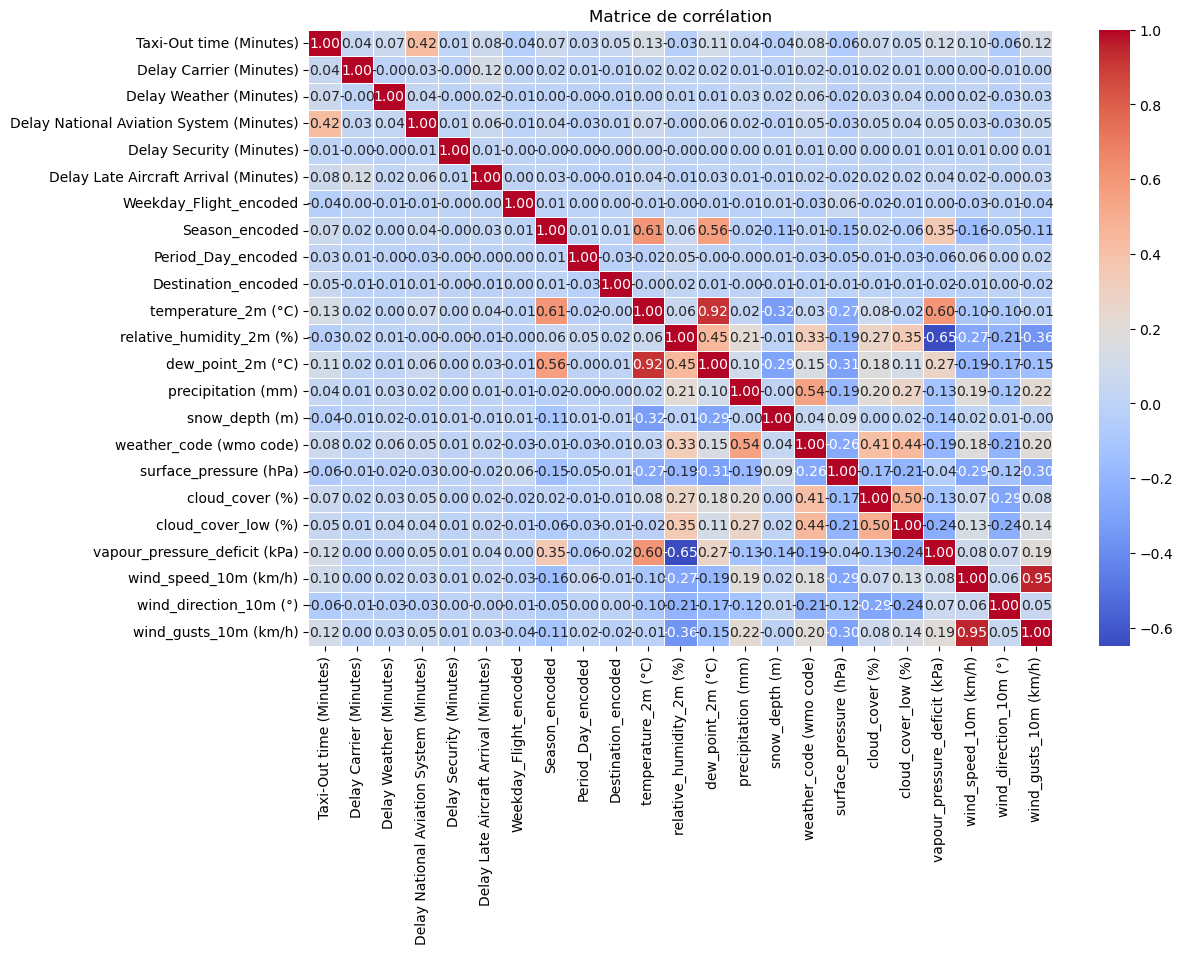

In [80]:
# Calculer la matrice de corrélation
correlation_matrix = X.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

<small> On remarque que la corrélation entre les variables **wind_speed_10m** (qui représente la vitesse du vent à 10m) et **wind_gusts_10m** (qui représente les rafales de vent) est de 0,95. Ainsi, nous choissons de supprimer la variable **wind_gusts_10m**.

La corrélation entre les variables **temperature_2m** (qui représente la température de l'air à 2 mètres au-dessus du sol) et **dew_point_2m** (qui représente la température du point de rosée) est égalemement elevé (0,92). Nous supprimerons la variable **dew_point_2m**.

Par ailleurs, la corrélation entre les variables **Departure Delay** et **Delay Carrier** est assez élevée mais nous ne supprimerons aucune d'entre elles. La variable **Departure Delay** ne sera pas utilisée pour la régression, nous la conservons pour effectuer des statistiques déscriptives et des représentations graphiques.

In [81]:
df.drop(columns=['wind_gusts_10m (km/h)', 'dew_point_2m (°C)'], inplace=True)

In [82]:
df.head()

,Date,Destination Airport,Scheduled departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snow_depth (m),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°)
0,2021-01-01,LAX,09:00:00,09:15:00,20.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,9,2021-01-01 09:00:00,-1.8,83,0.0,0.0,3,1031.6,99,0,0.09,9.0,2
1,2021-01-01,LAX,18:05:00,18:32:00,28.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Soir,0,0,1,2,9,2021-01-01 18:00:00,4.0,65,0.0,0.0,3,1030.1,100,0,0.28,10.6,100
2,2021-01-01,SFO,07:30:00,07:40:00,15.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,16,2021-01-01 08:00:00,-1.6,82,0.0,0.0,0,1031.7,14,0,0.10,9.2,349
3,2021-01-01,CLT,11:52:00,12:02:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,2,2021-01-01 12:00:00,-1.2,81,0.0,0.0,3,1032.8,100,0,0.10,10.0,21
4,2021-01-01,MIA,14:30:00,14:40:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Après-midi,0,0,1,0,10,2021-01-01 14:00:00,0.8,73,0.0,0.0,3,1033.4,99,0,0.17,11.6,36


#### **Analyse Descriptive et Visualisation Graphique**

**Dans cette partie, il s'agit d'une description complète de notre dataset ainsi qu'une analyse orientée sur les retards.**

<span style="color:darkmagenta;">**Contexte Général**</span>

**<small> Pour la compagnie aérienne American Airlines, nous dénombrons <span style="color:orange;">**50697 vols**</span> de départ de l’aéroport JFK sur la période allant du 01 Janvier 2020 jusqu'au 12 Août 2024. Cela représente en moyenne <span style="color:orange;">**34.68 vols**</span> par jour sur cette période.</small>**

In [304]:
#nombre de vols sur la période de notre dataset
nb_vols = len(df)

#nombre moyen de vols par jour sur cette période
df['Date'] = pd.to_datetime(df['Date'])
date_min = df['Date'].min()
date_max = df['Date'].max()
nb_moyen = round(nb_vols / ((date_max - date_min).days + 1),2)

print("nb_vols = ",nb_vols)
print("nb_moyen = ",nb_moyen)

nb_vols =  50697
nb_moyen =  34.68


**<span style="color:darkcyan;">Distribution des vols par jour</span>**

**<small>Nous obtenons <span style="color:orange;">une répartition uniforme sur les jours de la semaine</span> des vols de American Airlines de départ de l'aéroport JFK, avec une légère baisse le samedi (13.71%) et une légère hausse des volumétries de départs lundi et mardi (14.48%).</small>**

/tmp/ipykernel_526349/908643259.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pourcentage_vols.index, y=pourcentage_vols.values, palette="viridis")  # Création du graphique


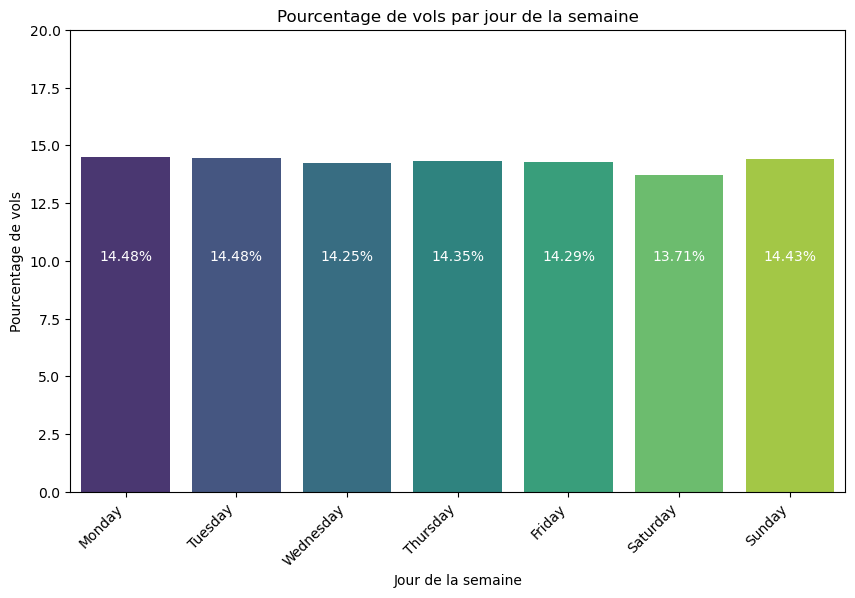

In [305]:
# Ordre des jours de la semaine
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Nombre total de vols
nb_vols = len(df)

# Nombre de vols par jour de la semaine
nb_vols_jour = df.groupby('Weekday_Flight').size()

# Calcul des pourcentages de vols par jour de la semaine
pourcentage_vols = (nb_vols_jour / nb_vols) * 100

# Convertir l'index en un type catégoriel avec un ordre spécifique
pourcentage_vols.index = pd.Categorical(pourcentage_vols.index, categories=order_days, ordered=True)

# Réordonner les données
pourcentage_vols = pourcentage_vols.sort_index()

# Création du graphique à barres
plt.figure(figsize=(10, 6))  
sns.barplot(x=pourcentage_vols.index, y=pourcentage_vols.values, palette="viridis")  # Création du graphique
plt.title('Pourcentage de vols par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Pourcentage de vols')

# Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter les pourcentages sur les barres
for i, value in enumerate(pourcentage_vols.values):
    plt.text(i, 10, f"{value:.2f}%", ha='center', va='baseline', color='white')  # Affichage des pourcentages en blanc

# Réglage de l'axe y
plt.ylim(0, 20)

plt.show()

<span style="color:darkmagenta;">**Focus sur les vols retardés**</span>

<small><span style="color:orange;">**16086 vols</span> de la compagnie AA de départ de l'aéroport JFK sont concernés par un retard au décollage, constituant un pourcentage d' à peu près <span style="color:orange;">30%</span>. 
La moyenne des retards pour les vols concernés est de <span style="color:orange;">39.72 minutes</span>, pour une valeur médiane de <span style="color:orange;">14 minutes</span> ( 50% des vols retardés sont d'un retard inférieur à 14 minutes par rapport à leur créneau de décollage programmé). Le retard au décollage maximal qu'a enregistré la compagnie à l'aéroport JFK est de <span style="color:orange;">1627 minutes</span>, soit <span style="color:orange;">27.12 heures</span> (il s'agit probablement d'un vol qui a été reporté).**
**Aussi, le fait que <span style="color:orange;">68% des vols sont à l'heure</span>, indique une bonne ponctualité globale des vols dans l'échantillon.** 
</small>

Nombre de vols retardés est  16086 vols.
Le retard maximal est de  1627.0 minutes, soit 27.12 heures.
La moyenne des retards est  39.72 minutes.
La médiane des retards est  14.0 minutes.


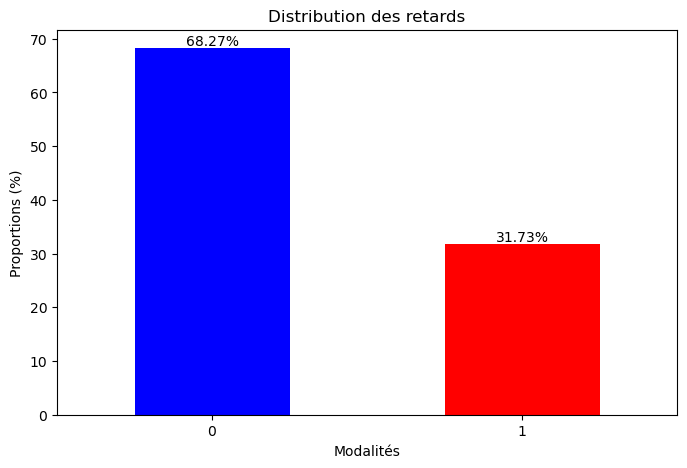

In [310]:
# Création d'un dataset pour l'analyse des vols uniquement retardés
vols_retardes = df[df['Retard'] == 1].copy()


# Comptage du nombre de vols en retards
count_vols_retardes = len(vols_retardes)

# Recherche du vols le plus retardé
retard_max = round(vols_retardes['Departure delay (Minutes)'].max(),2) 
retard_max_heures = round(retard_max/60,2)

# La moyenne et la médiane des retards
retard_moy = round(vols_retardes['Departure delay (Minutes)'].mean(),2)
retard_med = round(vols_retardes['Departure delay (Minutes)'].median(),2)

print("Nombre de vols retardés est ",count_vols_retardes,"vols.")
print("Le retard maximal est de ",retard_max,"minutes, soit",retard_max_heures,"heures.")
print("La moyenne des retards est ",retard_moy,"minutes.")
print("La médiane des retards est ",retard_med,"minutes.")

# Calcul des pourcentages pour chaque modalité (retard/non retard)
modalites = (df['Retard'].value_counts(normalize=True) * 100).round(2)

# Création du graphique en barres
ax = modalites.plot(kind='bar', color=['blue', 'red'], figsize=(8, 5))
plt.title('Distribution des retards')
plt.xlabel('Modalités')
plt.ylabel('Proportions (%)')

# Ajout des annotations pour indiquer les pourcentages au-dessus des barres
for i, v in enumerate(modalites):
    ax.annotate(f"{v}%", xy=(i, v), ha='center', va='bottom')

plt.xticks(rotation=0)

# Affichage du graphique
plt.show()

<span style="color:darkcyan;">**La saisonnalité des retards au départ au fil des années**</span>

<small>**Le graphique présente l'analyse mensuelle des retards au départ des vols de la compagnie American Airlines pour l'aéroport JFK sur différentes années. Les principales observations incluent <span style="color:orange;">des tendances saisonnières qui se répètent</span> d'une année à l'autre, avec des retards atteignant généralement leur pic durant <span style="color:orange;">l'été</span> et <span style="color:orange;">la fin de l'hiver (par exemple, en décembre)</span>. Exceptionnellement, l'année 2020 enregistre des retards de durée moyenne faible, en lien avec la réduction du trafic aérien durant la pandémie de COVID-19. Durant les années 2021 et 2022, une tendance à la hausse est observée, indiquant un retour à des fréquences de retards plus élevées ce qui peut être expliqué par le fait que les opérations de vol ont repris leur rythme normal. Cependant cette tendance haussière a été atténuée ces dernières années, notamment 2023 et 2024, ce qui peut être expliquer par l'amélioration de la gestion des vols auprès de la compagnie.**</small>

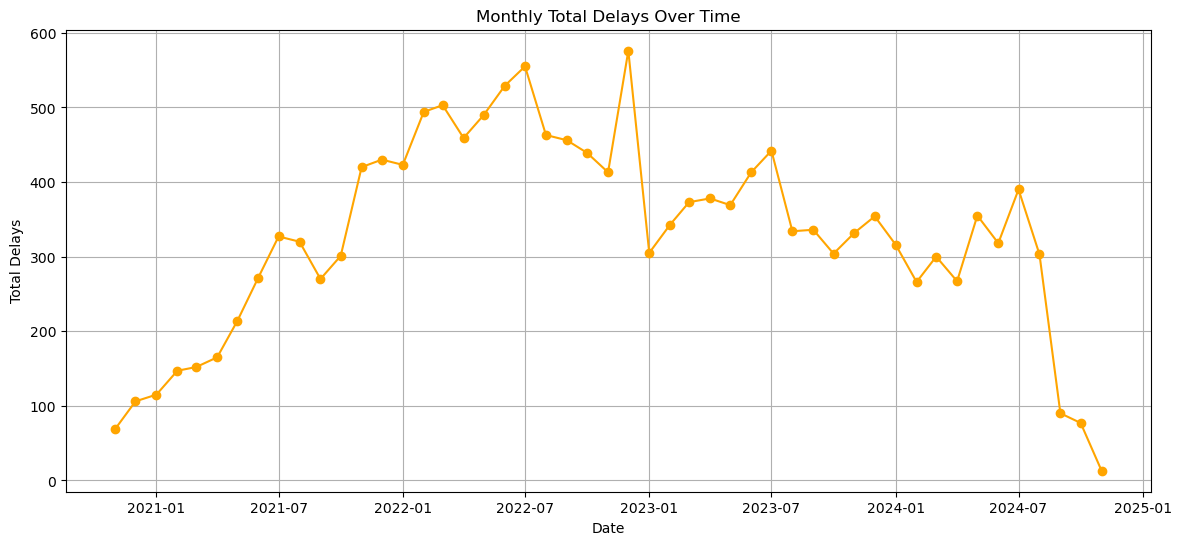

In [324]:
# Fonction pour tracer les tendances mensuelles des retards totaux
def plot_monthly_trend(column, title, ylabel):
    trend_data = vols_retardes.groupby(['Year', 'Month'])[column].sum().reset_index()
    trend_data['Date'] = pd.to_datetime(trend_data[['Year', 'Month']].assign(day=1))#
    plt.figure(figsize=(14, 6))
    plt.plot(trend_data['Date'], trend_data[column], marker='o', color='orange')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Graphiques des retards mensuels totaux
vols_retardes['Year']=vols_retardes['Date'].dt.year
vols_retardes['Month']=vols_retardes['Date'].dt.month
plot_monthly_trend('Retard', 'Monthly Total Delays Over Time', 'Total Delays')

**<span style="color:darkcyan;">Distribution des retards au départ par fréquence</span>**

<small>**En observant la distribution des retards par leur fréquence, nous obtenons une distribution qui <span style="color:orange;">ressemble à une loi exponentielle</span>, autour de la moyenne de 39.36 minutes et avec <span style="color:orange;">un étalement régulier des fréquences</span> vers le maximum de 1627 minutes**.</small>

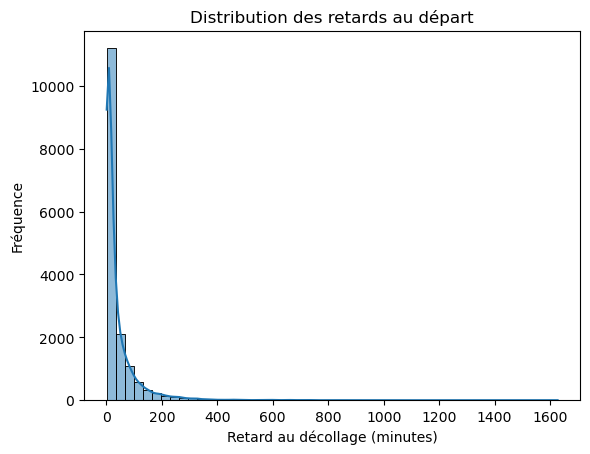

In [311]:
import seaborn as sns
# Distribution des retards d'arrivée
sns.histplot(data=vols_retardes, x='Departure delay (Minutes)', bins=50, kde=True)

# Ajout des titres et des libellés
plt.title('Distribution des retards au départ')
plt.xlabel('Retard au décollage (minutes)')
plt.ylabel('Fréquence')

# Affichage
plt.show()

**<span style="color:darkcyan;">Distribution des retards au départ par mois et par saison</span>**

<span style="margin-left: 30px;"><span style="color:olive;">**a. En terme de durée**</span></span>

<small>**Pour la répartition mensuelle, en erme de durée moyenne, des retards des vols de la compagnie au départ de l'aéroport JFK, nous observons <span style="color:orange;">une faible saisonnalité l'été</span> de juin à août. Inversement les mois mars et novembre sont le moins impactés par les retards.**</small>

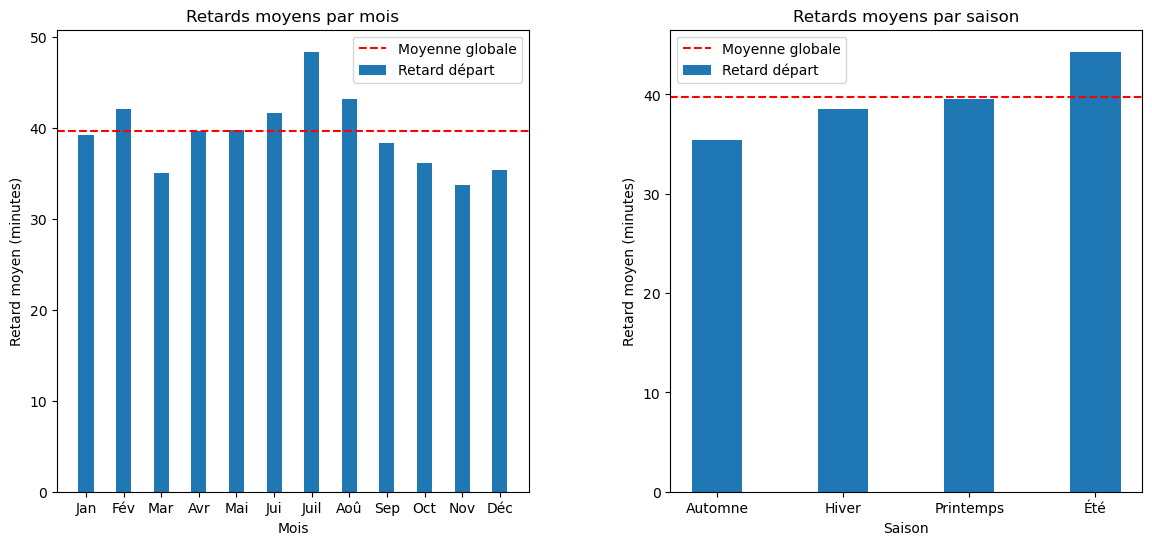

In [313]:
# Groupement des données par mois et calcul des retards moyens pour chaque mois
monthly_dep_delay = vols_retardes.groupby('Month')['Departure delay (Minutes)'].mean()  

# Calcul des retards moyens au départ par mois
retard_moy_mois = vols_retardes['Departure delay (Minutes)'].mean()

# Calcul des retards moyens par saison
saison_dep_delay = vols_retardes.groupby('Season')['Departure delay (Minutes)'].mean()  

# Création de la figure et de la grille de graphiques
plt.figure(figsize=(14, 6))

# Premier graphique : retards moyens par mois
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, graphique 1
plt.bar(monthly_dep_delay.index, monthly_dep_delay.values, width=0.4, label='Retard départ')

# Ajout de la moyenne globale des retards au départ en une ligne
plt.axhline(y=retard_moy_mois, color='r', linestyle='--', label='Moyenne globale')

# Ajout des titres et des libellés
months = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jui', 'Juil', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
plt.xticks(monthly_dep_delay.index, [months[i-1] for i in monthly_dep_delay.index])
plt.title('Retards moyens par mois')
plt.xlabel('Mois')
plt.ylabel('Retard moyen (minutes)')
plt.legend()

# Deuxième graphique : retards moyens par saison
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, graphique 2
plt.bar(saison_dep_delay.index, saison_dep_delay.values, width=0.4, label='Retard départ')

# Ajout de la moyenne globale des retards au départ en une ligne
plt.axhline(y=retard_moy_mois, color='r', linestyle='--', label='Moyenne globale')

# Ajout des titres et des libellés
plt.title('Retards moyens par saison')
plt.xlabel('Saison')
plt.ylabel('Retard moyen (minutes)')
plt.legend()

# Ajuster l'espacement entre les graphiques 
plt.subplots_adjust(wspace=0.3)

# Afficher les graphiques
plt.show()


<span style="margin-left: 30px;"><span style="color:olive;">**b. En terme de nombre de retard**</span></span>

<small>**On remarque qu'il y'a légèrement plus de retards en été que durant les autres saisons. Cela peut s'expliquer par une augmentation du volume des vols pendant la haute saison touristique. De plus, des facteurs comme la chaleur élevée peuvent également provoquer des perturbations opérationnelles.**</small> 

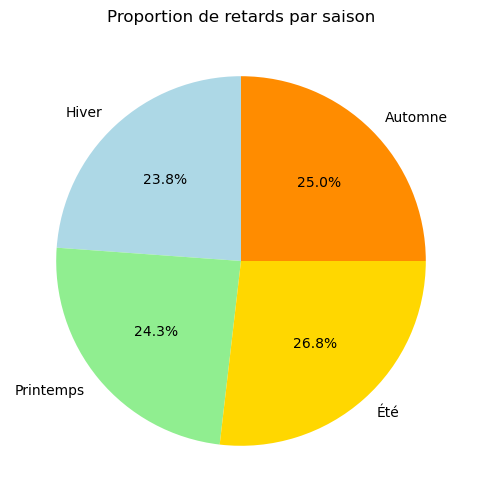

In [315]:
# Calculer la proportion des retards pour chaque période (par mois ici)
prop_retards_par_saison = df.groupby('Season')['Retard'].mean() * 100

color_map = {
    'Printemps': '#90EE90',  # Vert
    'Été': '#FFD700',       # Jaune
    'Automne': '#FF8C00',   # Orange
    'Hiver': '#ADD8E6'      # Bleu 
}

colors = [color_map[saison] for saison in prop_retards_par_saison.index]

# Créer un graphique en camembert
plt.figure(figsize=(8, 6))
plt.pie(prop_retards_par_saison, labels=prop_retards_par_saison.index.astype(str), 
        autopct='%1.1f%%', colors=colors)
plt.title("Proportion de retards par saison")

# Afficher le graphique
plt.show()

**<span style="color:darkcyan;">Distribution des retards au départ par mois et par saison</span>**

<span style="margin-left: 30px;"><span style="color:olive;">**a. En terme de durée**</span></span>

<small>**Idem pour la répartition journalière des retards au départ de l'aéroport JFK pour les vols de la compagnie American Airlines, où nous observons <span style="color:orange;">une faible saisonnalité lundi, mardi et mercredi</span> marqués par une légère hausse par rapport à la moyenne suivi d'<span style="color:orange;">une légère baisse jeudi et vendredi</span> avant de reprendre à nouveau sa tendance haussière. Nous remarquons encore que <span style="color:orange;">les vols programmés le matin sont ceux les plus concernés par les retards au départ</span> avec une durée moyenne de retard dépassant la moyenne générale.**</small>

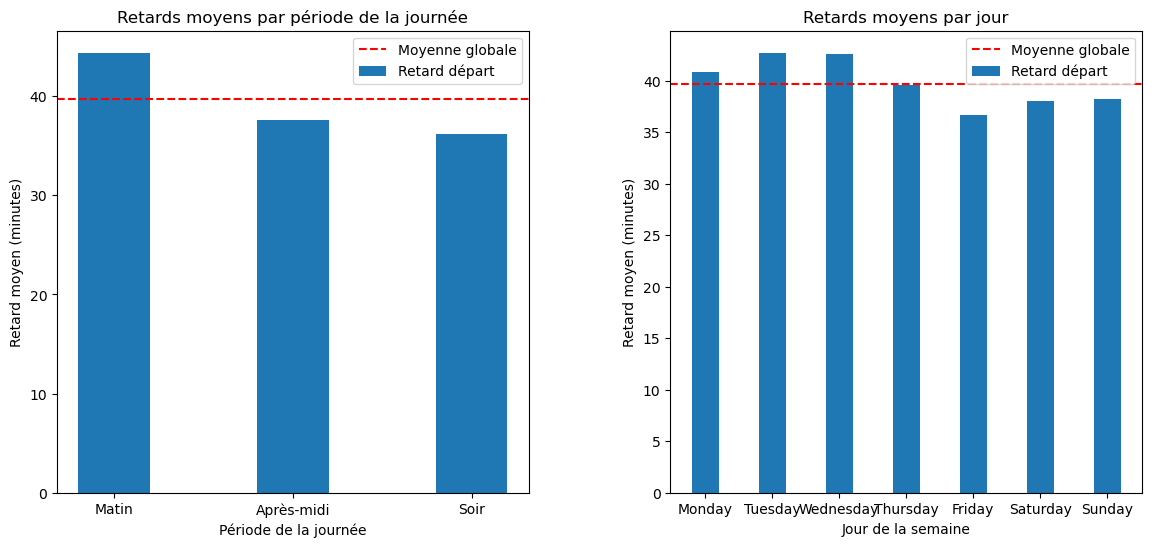

In [316]:
# Ordre des périodes de la journée
order_period = ['Matin', 'Après-midi', 'Soir']

# Groupement des données par période de la journée et calcul des retards moyens
period_dep_delay = vols_retardes.groupby('Period_Day')['Departure delay (Minutes)'].mean()

# Convertir l'index en un type catégoriel avec un ordre spécifique
period_dep_delay.index = pd.Categorical(period_dep_delay.index, categories=order_period, ordered=True)

# Réordonner les données
period_dep_delay = period_dep_delay.sort_index()

# Ordre des jours de la semaine
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Groupement des données par jour de la semaine et calcul des retards moyens
day_dep_delay = vols_retardes.groupby('Weekday_Flight')['Departure delay (Minutes)'].mean()

# Convertir l'index en un type catégoriel avec un ordre spécifique
day_dep_delay.index = pd.Categorical(day_dep_delay.index, categories=order_days, ordered=True)

# Réordonner les données
day_dep_delay = day_dep_delay.sort_index()

# Création de la figure et disposition des graphiques
plt.figure(figsize=(14, 6))

# Premier graphique : retards moyens par période de la journée
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
plt.bar(period_dep_delay.index, period_dep_delay.values, width=0.4, label='Retard départ')
plt.axhline(y=retard_moy, color='r', linestyle='--', label='Moyenne globale')
plt.title('Retards moyens par période de la journée')
plt.xlabel('Période de la journée')
plt.ylabel('Retard moyen (minutes)')
plt.legend()

# Deuxième graphique : retards moyens par jour de la semaine
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième graphique
plt.bar(day_dep_delay.index, day_dep_delay.values, width=0.4, label='Retard départ')
plt.axhline(y=retard_moy, color='r', linestyle='--', label='Moyenne globale')
plt.title('Retards moyens par jour')
plt.xlabel('Jour de la semaine')
plt.ylabel('Retard moyen (minutes)')
plt.legend()

# Ajuster l'espacement horizontal entre les graphiques
plt.subplots_adjust(wspace=0.3)

# Afficher les graphiques
plt.show()


<span style="margin-left: 30px;"><span style="color:olive;">**b. En terme de nombre de retard**</span></span>

<small>**On constate que la proportion de retards reste <span style="color:orange;">relativement stable</span> tout au long de la semaine. Il y'a légèrement plus de retards les jeudis, vendredis et dimanches.**</small>

<small>**La proportion de retards est <span style="color:orange;">plus faible le matin</span>. Cela peut s'expliquer par le fait que les vols matinaux sont moins impactés par des perturbations accumulées. Les retards sont plus fréquents le soir.**</small>

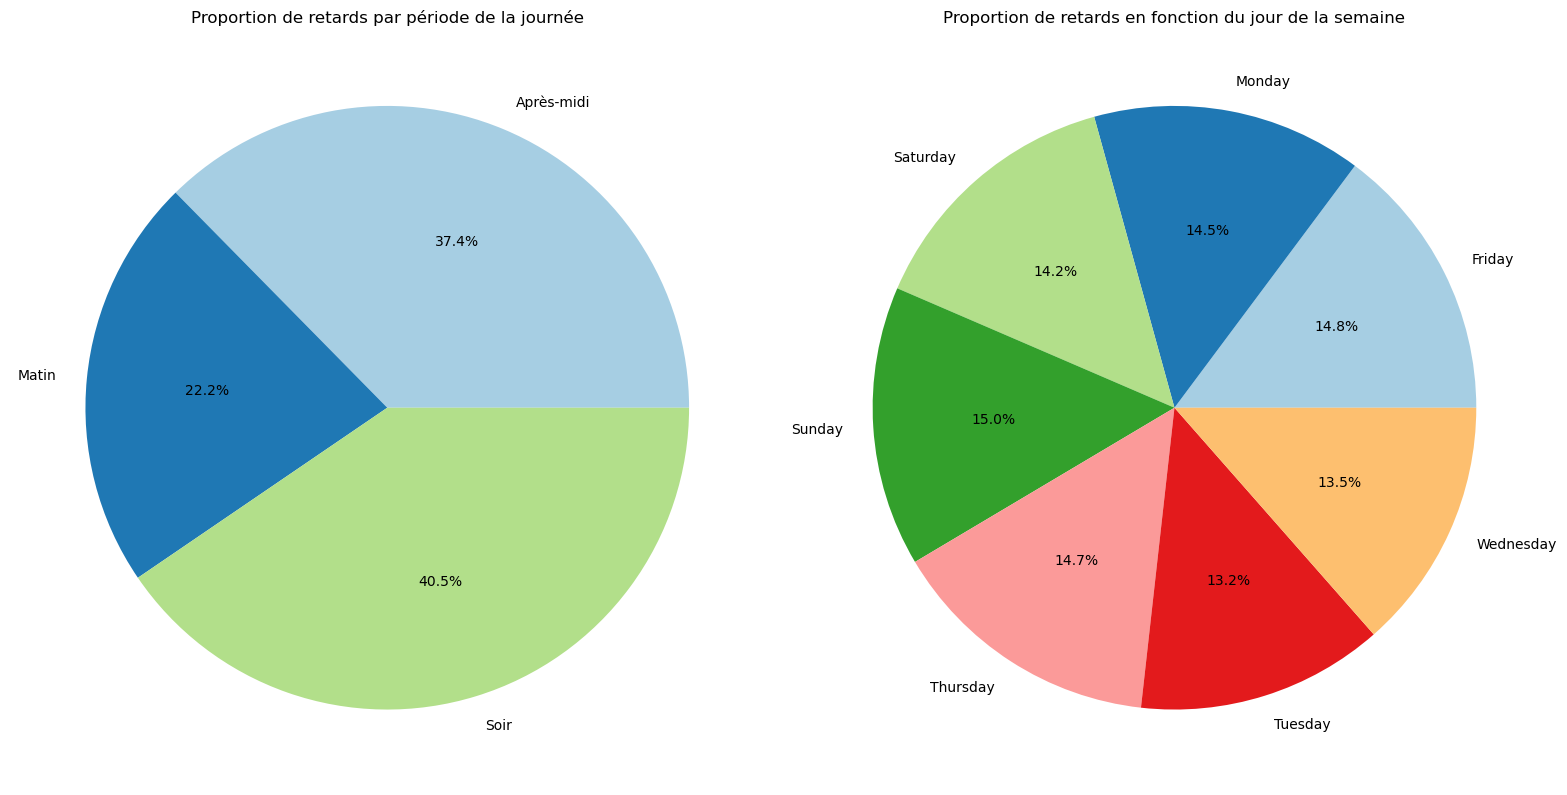

In [317]:

# Calculer les proportions des retards
proportion_retards_par_periode = df.groupby('Period_Day')['Retard'].mean() * 100
prop_retards_par_jour = df.groupby('Weekday_Flight')['Retard'].mean() * 100

# Créer une figure avec deux sous-graphiques côte à côte
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Premier camembert : Proportion des retards par période de la journée
axs[0].pie(proportion_retards_par_periode, labels=proportion_retards_par_periode.index.astype(str), 
           autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[0].set_title("Proportion de retards par période de la journée")

# Deuxième camembert : Proportion des retards par jour de la semaine
axs[1].pie(prop_retards_par_jour, labels=prop_retards_par_jour.index.astype(str), 
           autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[1].set_title("Proportion de retards en fonction du jour de la semaine")

# Ajuster l'espacement pour éviter les chevauchements
plt.tight_layout()

# Afficher les deux graphiques
plt.show()


**<span style="color:darkcyan;">Distribution des retards au départ par destination</span>**

<span style="margin-left: 30px;"><span style="color:olive;">**a. En terme de durée de retard**</span></span>

<small>**Les vols retardés de la compagnie American Airlines de départ de l'aéroport JFK est à destination <span style="color:orange;">l’aéroport régional Eagle County à Colorado (EGE)</span> se distingue par un fort retard moyen au départ proche des <span style="color:orange;">74.36 minutes</span>, soit une heure et 14 minutes en moyenne.
Inversement, les vols à destination <span style="color:orange;">l'aéroport international Raleigh Durham en Caroline du Nord (RDU)</span>sont ceux ayant le plus faible retard moyen de valeur <span style="color:orange;">5 minutes</span>.**</small>

/tmp/ipykernel_526349/3517589944.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=Airports_delays_rank['Retard moyen (Minutes)'], y=Airports_delays_rank['Destination Airport'], palette="viridis")


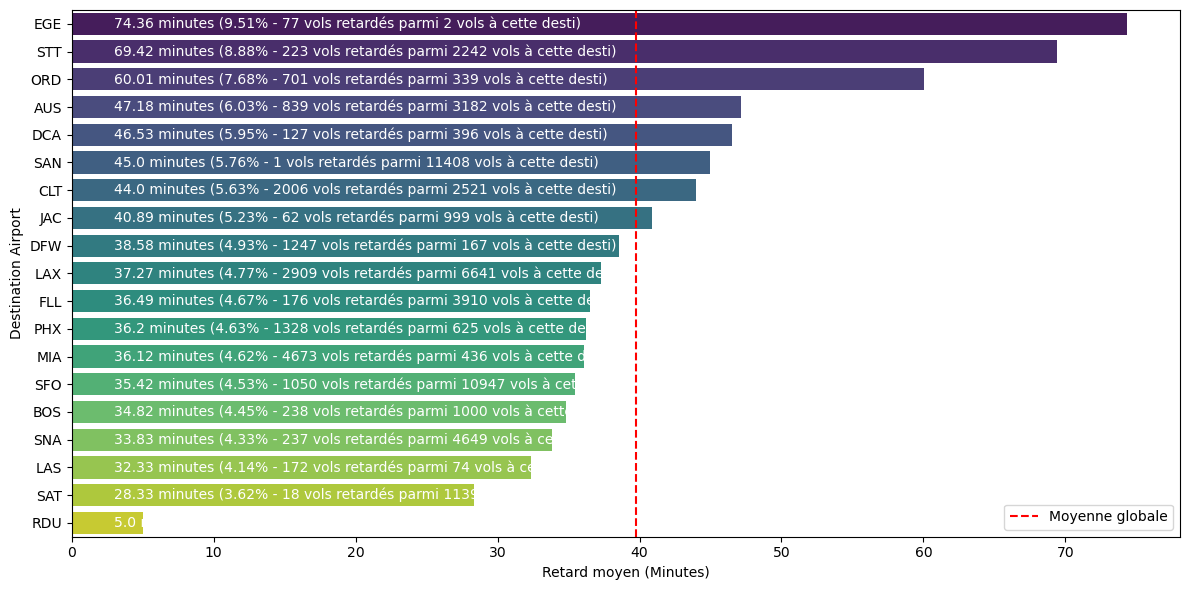

In [318]:
# Calcul des retards moyens de départ par aéroport et du nombre de vols
Airports_delays = vols_retardes.groupby(['Destination Airport']).agg({
    'Departure delay (Minutes)': 'mean',  # Moyenne des retards
    'Destination Airport': 'size'  # Compte le nombre de vols
}).rename(columns={'Destination Airport': 'Flight_Count','Departure delay (Minutes)': 'Retard moyen (Minutes)'}).reset_index()

Airports_delays = Airports_delays.sort_values(by='Flight_Count', ascending=False)
Airports_delays['Retard moyen (Minutes)'] = round(Airports_delays['Retard moyen (Minutes)'], 2)

total_delay_mean = Airports_delays['Retard moyen (Minutes)'].sum()

Airports_delays_rank = Airports_delays.sort_values(by='Retard moyen (Minutes)', ascending=False).reset_index()

Airports_delays_rank['Percentage'] = (Airports_delays_rank['Retard moyen (Minutes)'] / total_delay_mean) * 100

airport=df.groupby(['Destination Airport']).agg({
    'Departure delay (Minutes)': 'mean',  # Moyenne des retards
    'Destination Airport': 'size'  # Compte le nombre de vols
}).rename(columns={'Destination Airport': 'Flight_Count','Departure delay (Minutes)': 'Retard moyen (Minutes)'}).reset_index()
airport=airport.sort_values(by='Retard moyen (Minutes)', ascending=False).reset_index()


plt.figure(figsize=(12, 6))
bars = sns.barplot(x=Airports_delays_rank['Retard moyen (Minutes)'], y=Airports_delays_rank['Destination Airport'], palette="viridis")
plt.axvline(x=retard_moy, color='r', linestyle='--', label='Moyenne globale')
for i, (value, percent, count,nb) in enumerate(zip(
    Airports_delays_rank['Retard moyen (Minutes)'], 
    Airports_delays_rank['Percentage'], 
    Airports_delays_rank['Flight_Count'],
    airport['Flight_Count']
)):
    plt.text(3, i, f"{value} minutes ({percent:.2f}% - {count} vols retardés parmi {nb} vols à cette desti)", ha='left', va='center', color='white')
plt.legend()
plt.tight_layout()
plt.show()


<small>**<span style="color:orange;">Visualisation sur carte**</span></small>

<small>**En nous aidant d'une carte pour visualiser ces retards moyens par aéroport, nous constatons que nos aéroports de destination sont <span style="color:orange;">répartis sur l'ensemble du territoire des États Unis</span>. Nous pouvons aussi remarquer une plus forte concentration en <span style="color:orange;">sud ouest</span> et sur <span style="color:orange;">la cote nord-est autour de New York</span>.**</small>

In [320]:
import requests
import geopy
from geopy.geocoders import Nominatim
import folium

url="https://davidmegginson.github.io/ourairports-data/airports.csv"
# Effectuer la requête GET
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Enregistrer le contenu dans un fichier CSV
    with open("aer.csv", "wb") as file:
        file.write(response.content)
    print("Téléchargement terminé ! Les données sont enregistrées dans 'aer.csv'.")
else:
    print(f"Erreur lors de la requête : {response.status_code}")

aer= pd.read_csv('/home/onyxia/work/Projet_Python-pour-la-data-science/aer.csv')
us_aeroport = aer[aer['iso_country'] == 'US'][['latitude_deg', 'longitude_deg', 'iata_code']]


Airports_delays = pd.merge(Airports_delays, us_aeroport, left_on='Destination Airport', right_on='iata_code', how='left')

# Création d'un objet géocodeur Nominatim
geolocator = Nominatim(user_agent="my_geocoder")
 
# Géocodage d'une adresse
location = geolocator.geocode("STT")
 
# Affichage des informations de localisation
print("Latitude:", location.latitude, "Longitude:", location.longitude)

Airports_delays['latitude_deg'] = Airports_delays['latitude_deg'].fillna(location.latitude)
Airports_delays['longitude_deg'] = Airports_delays['longitude_deg'].fillna(location.longitude)

Airports_delays = Airports_delays.drop('iata_code', axis=1)


Téléchargement terminé ! Les données sont enregistrées dans 'aer.csv'.
Latitude: 18.33476905 Longitude: -64.9724536459818


In [321]:

# Créer la carte centrée sur les États-Unis
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)  # Coordonnées approximatives du centre des USA

# Ajouter les points des aéroports avec les retards
for _, row in Airports_delays.iterrows():
    folium.CircleMarker(
        location=[row['latitude_deg'], row['longitude_deg']],
        radius=row['Retard moyen (Minutes)']*0.5,  # Ajuster la taille des points en fonction du retard
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.3,
        popup=f"{row['Destination Airport']}\nDelay: {row['Retard moyen (Minutes)']} minutes"
    ).add_to(m)

# Afficher la carte
m

<span style="margin-left: 30px;"><span style="color:olive;">**b. En terme de nombre de retard**</span></span>

<small>**Les vols à destination de <span style="color:orange;">San Francisco, Dallas-Fort Worth, Las Vegas, Miami, Washington D.C. et Jackson</span> ont des retards <span style="color:orange;">légèrement supérieurs</span> à ceux des autres destinations.**</small>

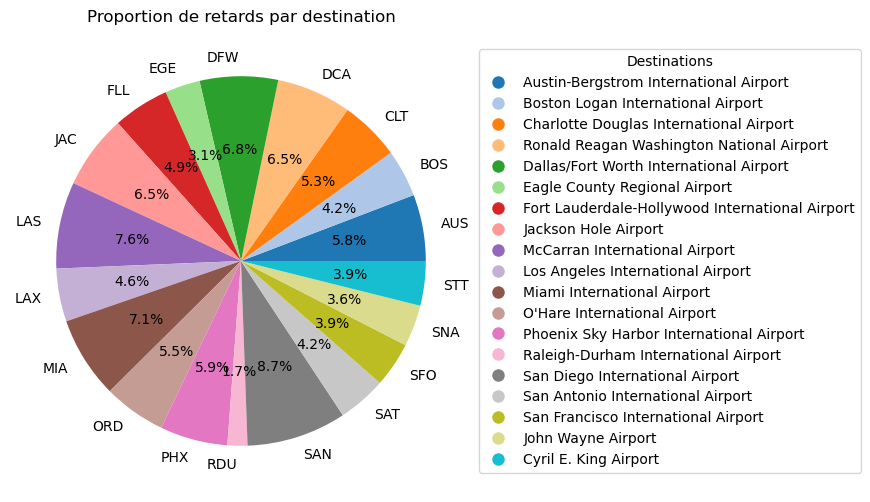

In [322]:
#On calcule la proportion des retards pour chaque destination
prop_retards_par_destination = df.groupby('Destination Airport')['Retard'].mean() * 100

# Utiliser les acronymes pour les labels du graphique
labels = prop_retards_par_destination.index  # Définir les labels comme étant les acronymes des destinations

# Créer le graphique en camembert
plt.figure(figsize=(8, 6))
colors = plt.cm.tab20(range(len(prop_retards_par_destination)))  # Choisir une palette de 20 couleurs
plt.pie(prop_retards_par_destination, labels=prop_retards_par_destination.index, autopct='%1.1f%%', colors=colors)

# Dictionnaire de correspondance entre les acronymes des destinations et les noms complets des aéroports
noms_destinations = {
    'LAX': 'Los Angeles International Airport',
    'CLT': 'Charlotte Douglas International Airport',
    'SFO': 'San Francisco International Airport',
    'MIA': 'Miami International Airport',
    'ORD': 'O\'Hare International Airport',
    'BOS': 'Boston Logan International Airport',
    'EGE': 'Eagle County Regional Airport',
    'PHX': 'Phoenix Sky Harbor International Airport',
    'DFW': 'Dallas/Fort Worth International Airport',
    'AUS': 'Austin-Bergstrom International Airport',
    'DCA': 'Ronald Reagan Washington National Airport',
    'SNA': 'John Wayne Airport',
    'JAC': 'Jackson Hole Airport',
    'STT': 'Cyril E. King Airport',
    'LAS': 'McCarran International Airport',
    'RDU': 'Raleigh-Durham International Airport',
    'FLL': 'Fort Lauderdale-Hollywood International Airport',
    'SAT': 'San Antonio International Airport',
    'SAN': 'San Diego International Airport'
}

# Ajouter la légende avec les noms complets des aéroports
handles = [plt.Line2D([0], [0], marker='o', color='w', label=noms_destinations.get(acronyme, acronyme),
                      markersize=10, markerfacecolor=colors[i]) for i, acronyme in enumerate(labels)]
plt.legend(handles=handles, title="Destinations", loc="center left", bbox_to_anchor=(1, 0.5))


plt.title("Proportion de retards par destination")

# Afficher le graphique
plt.show()

<span style="color:darkmagenta;">**Relation entre les retards et les variables explicatives**</span>

<small>**Dans ce qui suit, nous allons essayé de faire des  visualisations pour nous aider à identifier les patterns distincts et les impacts de quelques variables sur les retards au départ au fil du temps.**</small>

<span style="margin-left: 30px;"><span style="color:darkcyan;">**Delay Carrier, Delay National Aviation System, Delay Security et Delay Late Aircraft Arrival**</span></span>

<small>**<span style="color:orange;">Retards liés à la compagnie aérienne :</span> La baisse autour de 2020, probablement en raison de l'impact de la pandémie de COVID-19, peut être expliquée par le fait qu'American Airlines a dû réduire ses vols, ce qui a naturellement diminué les retards en raison de la baisse du trafic aérien. Après la pandémie, le retour de l'activité des vols à la normale a entraîner une reprise des retards indiquée par l'augmentation régulière du nombre des retards sur le graphe, imposant le retour des défis liés à la gestion d'un volume plus élevé de vols.**


**<span style="color:orange;">Retards liés au système de gestion du trafic aérien (NAS) :</span> Nous observons une baisse notable pendant la pandémie, suivie d'une augmentation progressive à mesure que le trafic aérien a été repris. Cela pourrait indiquer que le système de gestion du trafic aérien rencontre de nouveau des difficultés à gérer la reprise rapide du volume de vols, nécessitant ainsi des améliorations dans la gestion du trafic pour faire face à la croissance du nombre de vols.**

**<span style="color:orange;">Retards liés à la sécurité :</span> Généralement faibles en comparaison avec les autres causes de retards, mais avec des pics intermittents, indiquant des événements occasionnels de sécurité ayant un impact sur les vols.**</small>

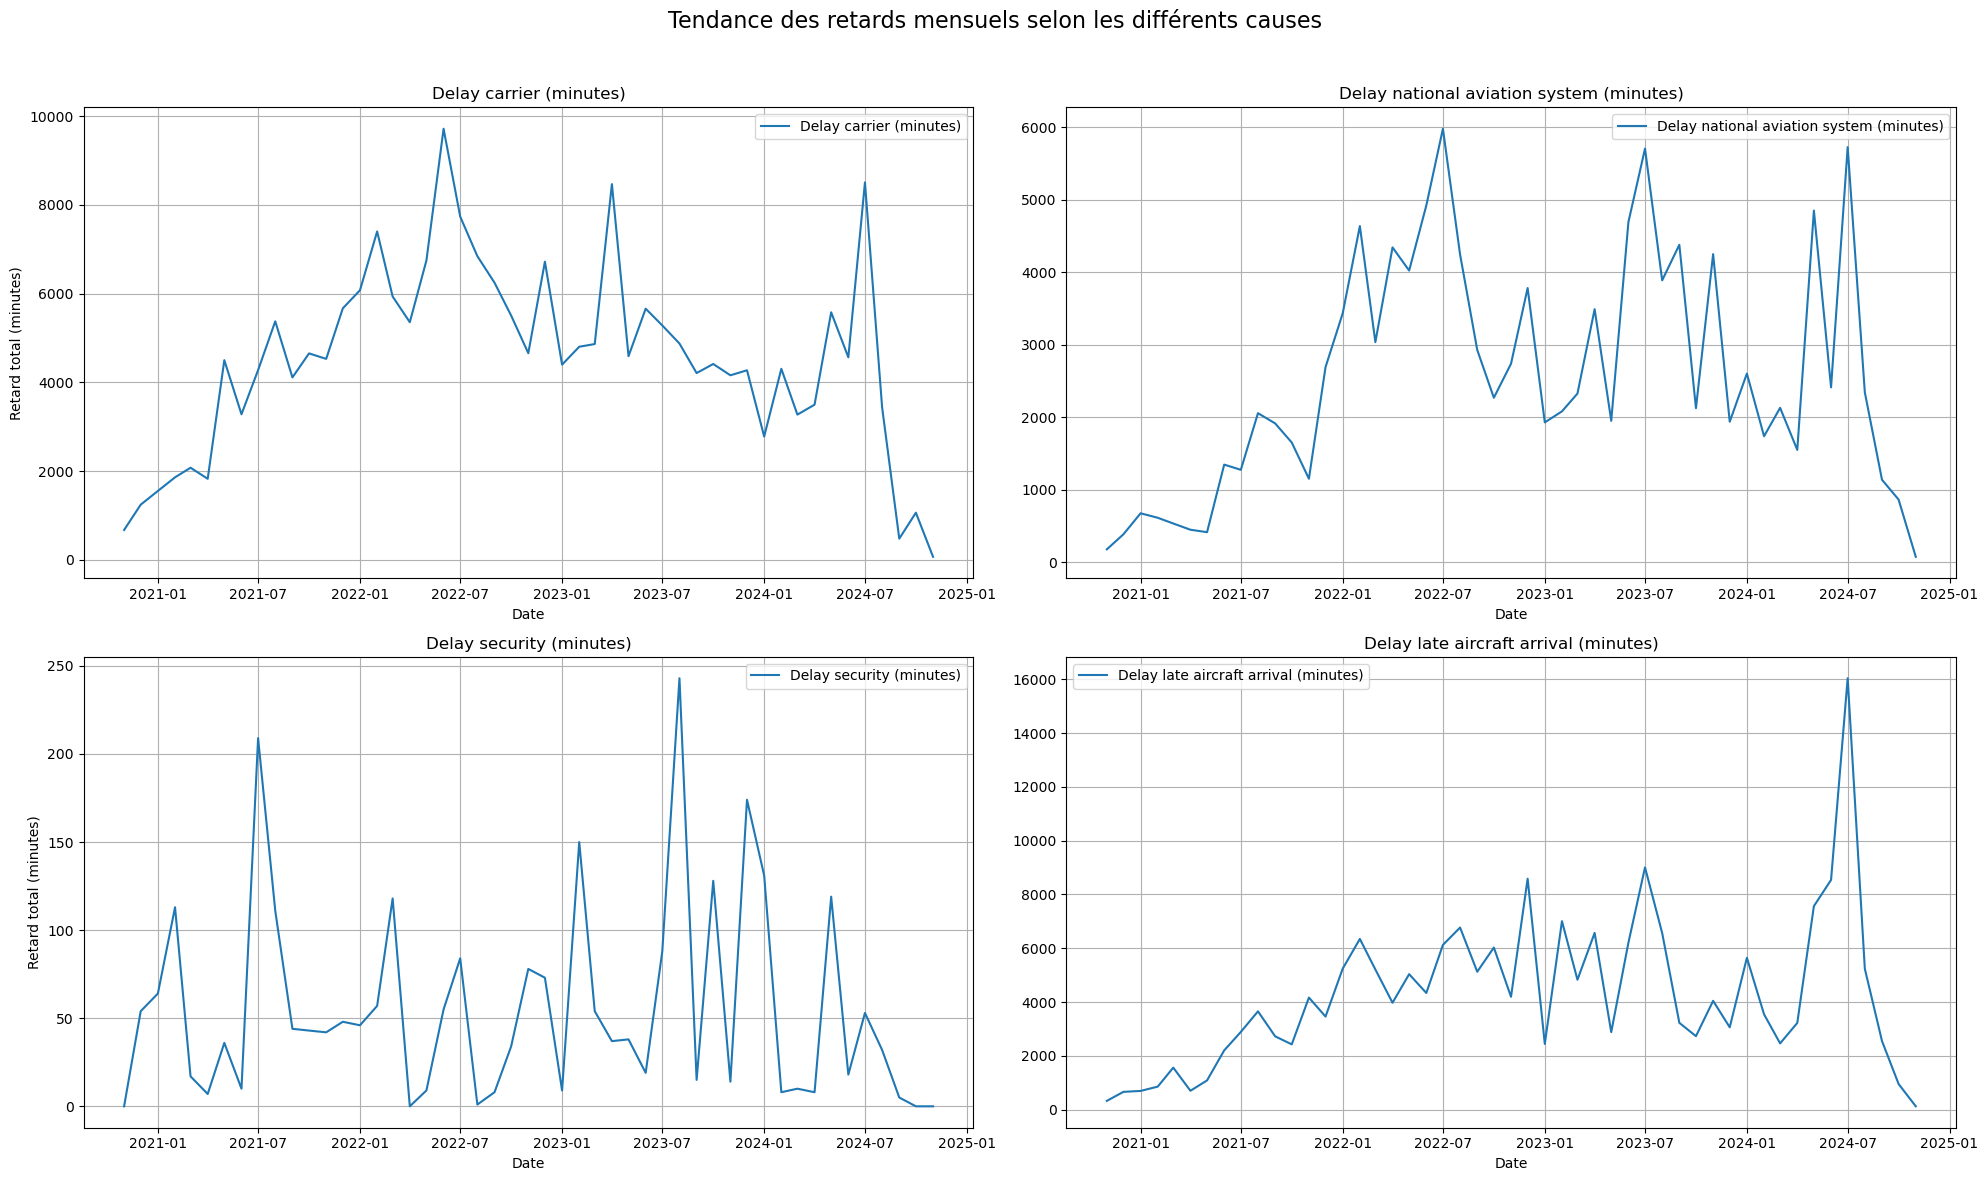

In [326]:
# Liste des colonnes correspondant aux raisons des retards
delay_reasons = ['Delay Carrier (Minutes)', 'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']

# Afficher tous les graphiques des raisons des retards en une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Tendance des retards mensuels selon les différents causes', fontsize=16)

for i, reason in enumerate(delay_reasons[:4]):  # Afficher uniquement 4 raisons sur 2x2
    ax = axes[i // 2, i % 2]
    trend_data = vols_retardes.groupby(['Year', 'Month'])[reason].sum().reset_index()
    trend_data['Date'] = pd.to_datetime(trend_data[['Year', 'Month']].assign(day=1))
    ax.plot(trend_data['Date'], trend_data[reason], label=reason.replace("_", " ").capitalize())
    ax.set_title(f'{reason.replace("_", " ").capitalize()}')
    ax.set_xlabel('Date')
    if i % 2 == 0:        
        ax.set_ylabel('Retard total (minutes)')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<span style="margin-left: 30px;"><span style="color:darkcyan;">**Retard et Variables Météorologiques**</span></span>

In [327]:
df4=df.copy() #nous faisons une copie pour que nos modifications n'impactent pas notre base

<span style="margin-left: 35px;"><span style="color:olive;">**a. Retard et Température**</span></span>

In [328]:
#on divise notre variable température en 10 intervalles égaux
df4['temp'] = pd.cut(df4['temperature_2m (°C)'], bins=10) 

# Calcul du taux de retard moyen par intervalle de température
stats_temp = df4.groupby('temp')['Retard'].mean().reset_index()

/tmp/ipykernel_526349/3919516409.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_temp = df4.groupby('temp')['Retard'].mean().reset_index()


/tmp/ipykernel_526349/4269220324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp', y='Retard', data=stats_temp, palette=colors)  # Palette ajoutée


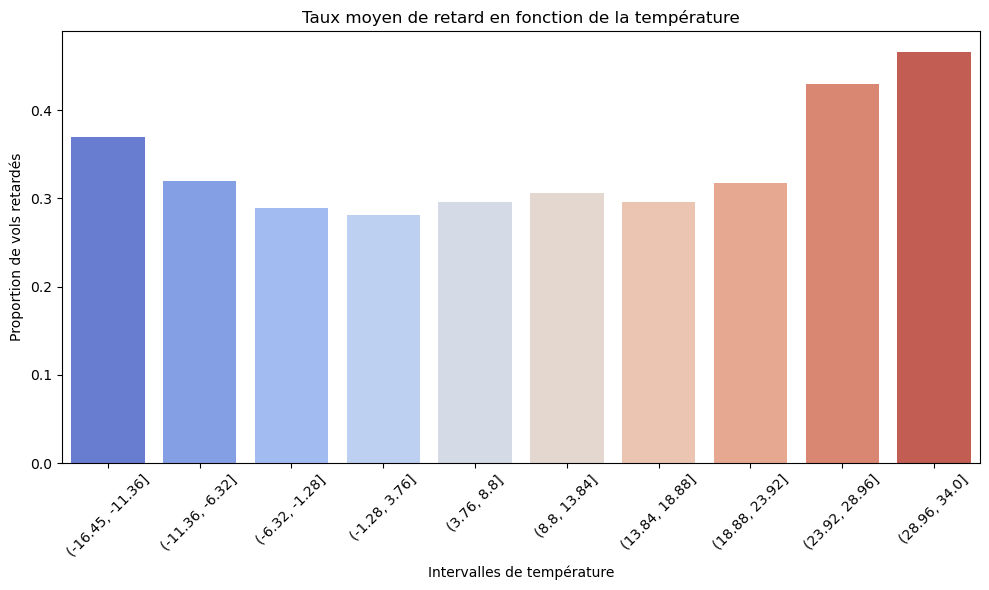

In [329]:
# Définir un dégradé de couleurs basé sur les intervalles de température
colors = sns.color_palette("coolwarm", len(stats_temp))  # Dégradé bleu-rouge

plt.figure(figsize=(10, 6))
sns.barplot(x='temp', y='Retard', data=stats_temp, palette=colors)  # Palette ajoutée
plt.xticks(rotation=45)
plt.title("Taux moyen de retard en fonction de la température")
plt.xlabel("Intervalles de température")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

<small>**Les proportions de vols retardés sont <span style="color:orange;">plus élevées pour les températures extrêmes</span> (très basse ou très hautes). Ces températures extremes semblent avoir un impact négatif sur la ponctualité des vols, probablement en raison des perturbations qu'elles causent. Cependant cet impact ne semble pas très important.** 

**Pour avoir plus de précision sur la relation entre les deux variables, nous représentons le retard moyen par intervalles de températures.** </small>

In [ ]:
# Calcul du retard moyen par intervalle de température
stats_temp1 = df4.groupby('temp')['Delay Carrier (Minutes)'].mean().reset_index()

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_7152/4106609570.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_temp1 = df4.groupby('temp')['Delay Carrier (Minutes)'].mean().reset_index()


/Users/ghorafimanal/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


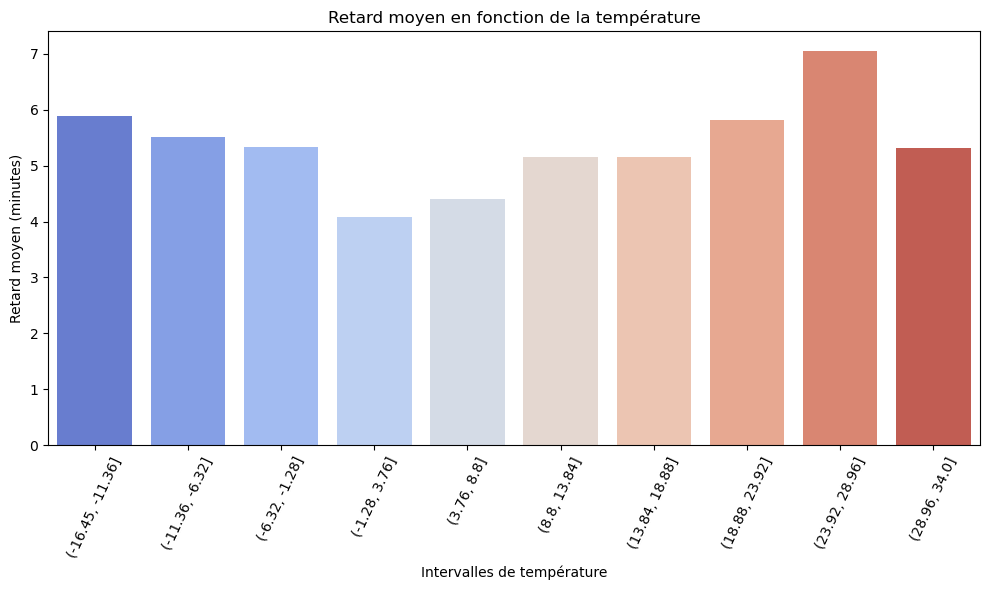

In [ ]:
# Définir un dégradé de couleurs basé sur les intervalles de température
colors = sns.color_palette("coolwarm", len(stats_temp))  # Dégradé bleu-rouge

plt.figure(figsize=(10, 6))
sns.barplot(x='temp', y='Delay Carrier (Minutes)', data=stats_temp1, palette=colors)
plt.xticks(rotation=65)
plt.title("Retard moyen en fonction de la température")
plt.xlabel("Intervalles de température")
plt.ylabel("Retard moyen (minutes)")
plt.tight_layout()
plt.show()

<small>**On observe que <span style='color:orange;'>les retards moyens varient légèrement en fonction des intervalles de température</span>, avec un maximum d'environ 7 minutes. Les températures extrêmes, qu'elles soient très basses (inférieures à -11°C) ou très élevées (supérieures à 24°C), sont associées à des retards moyens légèrement plus importants. En revanche, ces variations restent limitées. Ainsi, bien que la température puisse avoir un impact sur les retards, celui-ci reste modéré et n’entraîne pas de perturbations majeures dans le système observé.** </small>

<span style="margin-left: 30px;"><span style="color:olive;">**b. Retard et Vitesse du Vent**</span></span>

In [330]:
#on divise notre variable vitesse en 15 intervalles égaux
df4['vitesse'] = pd.cut(df4['wind_speed_10m (km/h)'], bins=15) 

# Calcul du taux de retard moyen par intervalle de vitesse
stats_wind = df4.groupby('vitesse')['Retard'].mean().reset_index()

/tmp/ipykernel_526349/3717672469.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_wind = df4.groupby('vitesse')['Retard'].mean().reset_index()


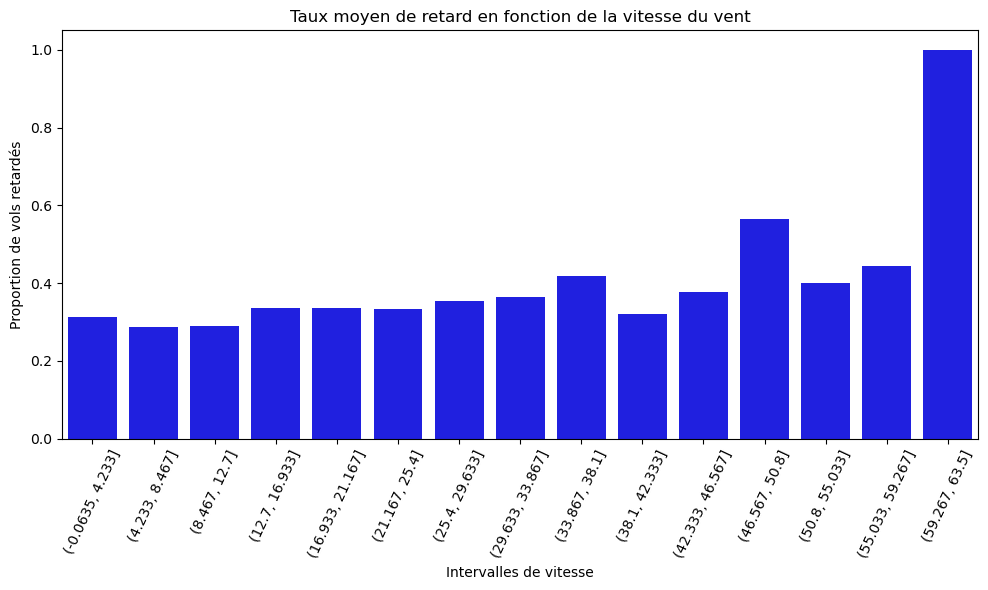

In [331]:
plt.figure(figsize=(10, 6))
sns.barplot(x='vitesse', y='Retard', data=stats_wind, color='blue')
plt.xticks(rotation=65)
plt.title("Taux moyen de retard en fonction de la vitesse du vent")
plt.xlabel("Intervalles de vitesse")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

<small>**On observe une <span style ='color:orange;'>relation croissante entre la vitesse du vent et la proportion de vols retardés</span>. À vitesse de vent très élevée (plus de 59 m/s), la proportion de vols retardés atteint presque 100%. Cela montre que des vents extrêmes perturbent significativement le trafic aérien.** 

**Pour approfondir cette observation, nous avons calculé le retard moyen (en minutes) par intervalle de vitesse du vent. Nous voulons savoir si les vents les plus rapides sont associés non seulement à une fréquence accrue de retards, mais également à des retards plus longs.**</small> 

In [332]:
# Calcul du retard moyen par intervalle de vitesse
stats_wind1 = df4.groupby('vitesse')['Delay Carrier (Minutes)'].mean().reset_index()

/tmp/ipykernel_526349/30598821.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_wind1 = df4.groupby('vitesse')['Delay Carrier (Minutes)'].mean().reset_index()


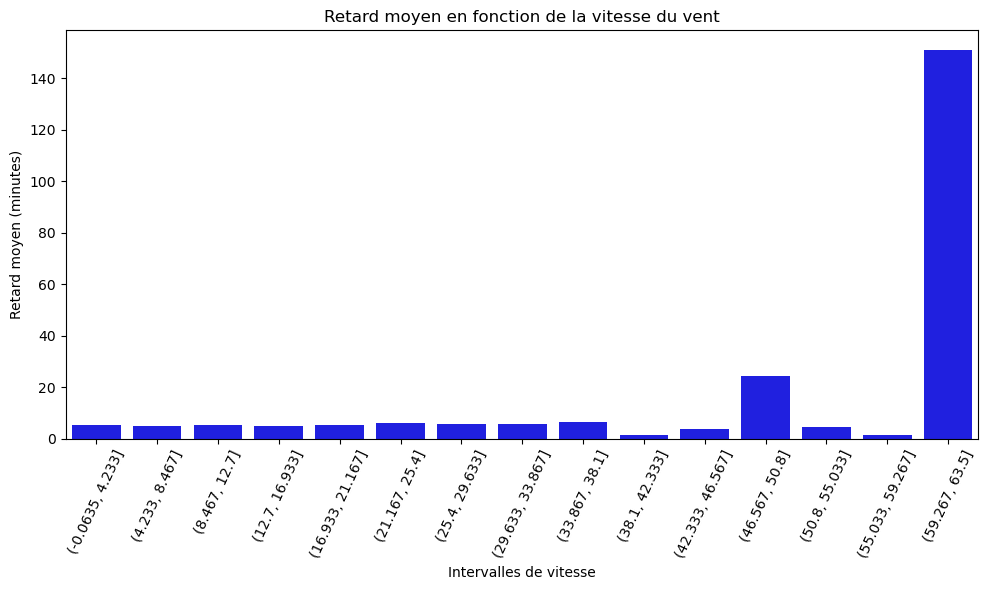

In [333]:
plt.figure(figsize=(10, 6))
sns.barplot(x='vitesse', y='Delay Carrier (Minutes)', data=stats_wind1, color='blue')
plt.xticks(rotation=65)
plt.title("Retard moyen en fonction de la vitesse du vent")
plt.xlabel("Intervalles de vitesse")
plt.ylabel("Retard moyen (minutes)")
plt.tight_layout()
plt.show()

<small>**Pour la majorité des intervalles de vitesse du vent, le retard moyen reste faible (souvent inférieur à 10 minutes). Ainsi, des vitesses modérées n'ont pas un impact significatif sur la durée des retards.**

**Dans l'intervalle de 59-63,5 m/s, le retard moyen explose pour atteindre plus de 140 minutes. Cela montre que des vents extrêmement puissants non seulement augmentent la fréquence des retards, mais entraînent également des perturbations prolongées.**</small> 

<span style="margin-left: 30px;"><span style="color:olive;">**c. Retard et Précipitation**</span></span>

In [334]:
#on divise notre variable précipitation en 7 intervalles égaux
df4['Precip'] = pd.cut(df4['precipitation (mm)'], bins=7) 

# Calcul du taux de retard moyen par intervalle de précipitation
stats_precip = df4.groupby('Precip')['Retard'].mean().reset_index()

/tmp/ipykernel_526349/1762457874.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_precip = df4.groupby('Precip')['Retard'].mean().reset_index()


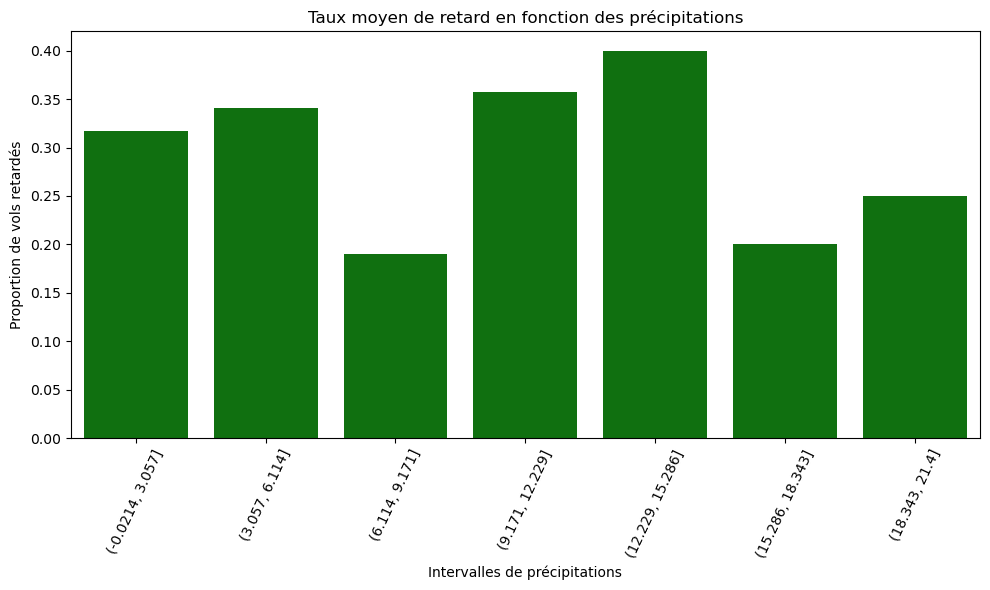

In [335]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Precip', y='Retard', data=stats_precip, color='green')
plt.xticks(rotation=65)
plt.title("Taux moyen de retard en fonction des précipitations")
plt.xlabel("Intervalles de précipitations")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

<small>**Pour rappel, la variable précipitation correspond aux précipitations totales (pluie, averse,neige) de l'heure précédente, exprimées en millimètres.**

**On observe que l'effet des précipitations sur les retards des vols <span style='color:orange;'>n'est pas linéaire</span>. De faibles précipitations correspondent à un taux de retard moyen de 30%. Cependant, un pic apparaît pour des précipitations allant de 12.29 mm à 15.286 mm, où la proportion de vols retardés atteint 40%. Puis, la proportion de vols retardés diminuent pour des fortes précipitations.**

**Il est compliqué de conclure sur la nature de la relation entre ces deux variables.**</small> 

In [336]:
# Calcul du retard moyen par intervalle de vitesse
stats_precip1 = df4.groupby('Precip')['Delay Carrier (Minutes)'].mean().reset_index()

/tmp/ipykernel_526349/1429566211.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_precip1 = df4.groupby('Precip')['Delay Carrier (Minutes)'].mean().reset_index()


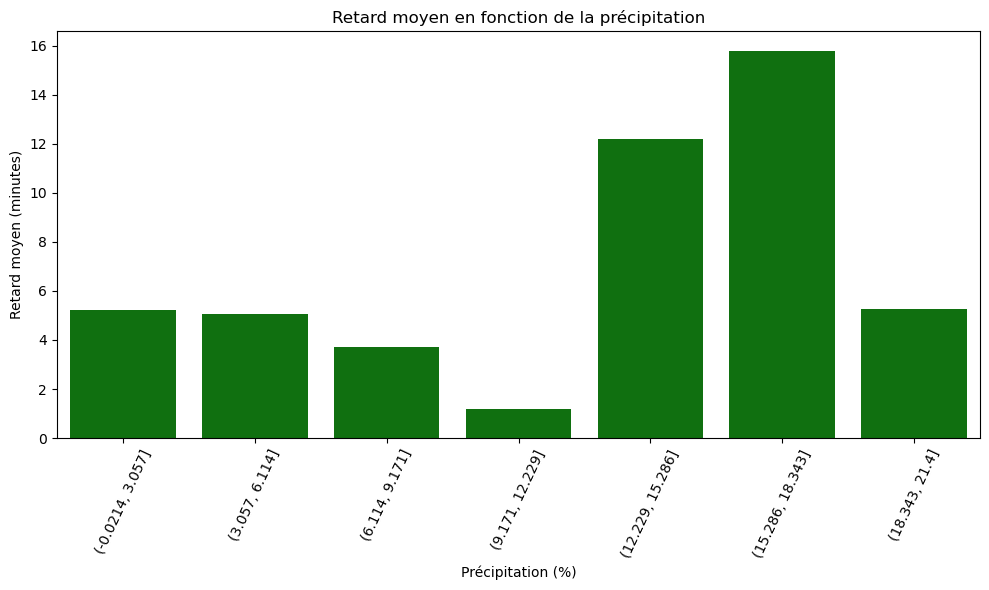

In [339]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Precip', y='Delay Carrier (Minutes)', data=stats_precip1, color='green')
plt.xticks(rotation=65)
plt.title("Retard moyen en fonction de la précipitation")
plt.xlabel("Précipitation (%)")
plt.ylabel("Retard moyen (minutes)")
plt.tight_layout()
plt.show()

<small>**On observe que les retards moyens varient  en fonction des intervalles de précipitation, avec une forte concentration dans l'intervalle (15.286 , 18.343]**. 

**Cette concentration peut nous amener à penser que la météo dans la région est caractérisée par des précipitations, considérées fortes, récurrentes dans cet intervalle influençant négativement les vols au départ.**</small>

<span style="margin-left: 30px;"><span style="color:olive;">**d. Retard et Couverture Nuageuse**</span></span>

In [340]:
#on divise notre variable couverture nuageuse en 10 intervalles égaux
df4['couv_nuag'] = pd.cut(df4['cloud_cover (%)'], bins=10) 

In [341]:
# Calcul du taux de retard moyen par intervalle de couv_nuageuse
stats_couv = df4.groupby('couv_nuag')['Retard'].mean().reset_index()

/tmp/ipykernel_526349/503161124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_couv = df4.groupby('couv_nuag')['Retard'].mean().reset_index()


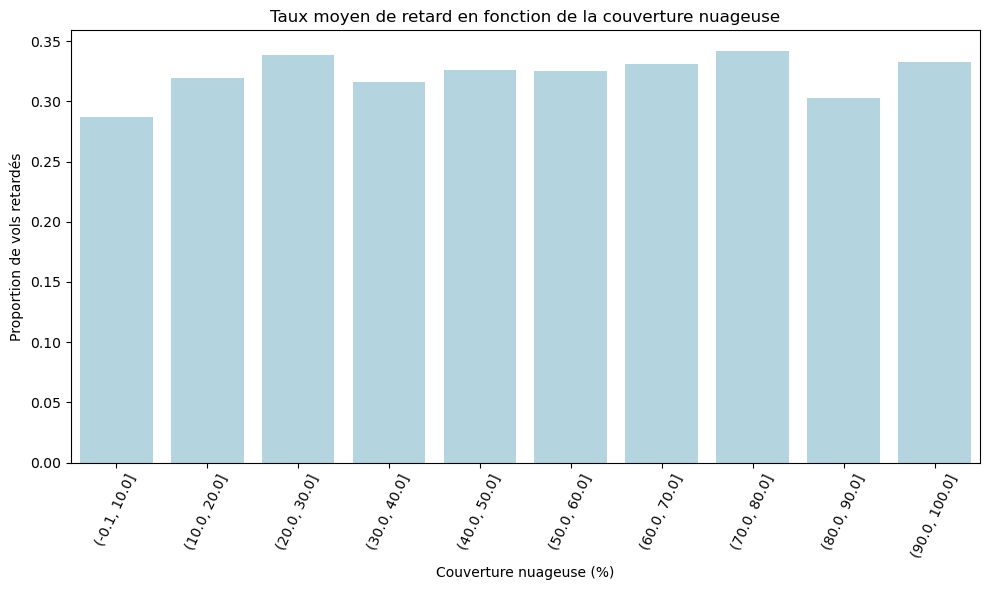

In [342]:
plt.figure(figsize=(10, 6))
sns.barplot(x='couv_nuag', y='Retard', data=stats_couv, color='lightblue')
plt.xticks(rotation=65)
plt.title("Taux moyen de retard en fonction de la couverture nuageuse")
plt.xlabel("Couverture nuageuse (%)")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

In [343]:
# Calcul du retard moyen par intervalle de couv_nuageuse
stats_couv1 = df4.groupby('couv_nuag')['Delay Carrier (Minutes)'].mean().reset_index()

/tmp/ipykernel_526349/59007913.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_couv1 = df4.groupby('couv_nuag')['Delay Carrier (Minutes)'].mean().reset_index()


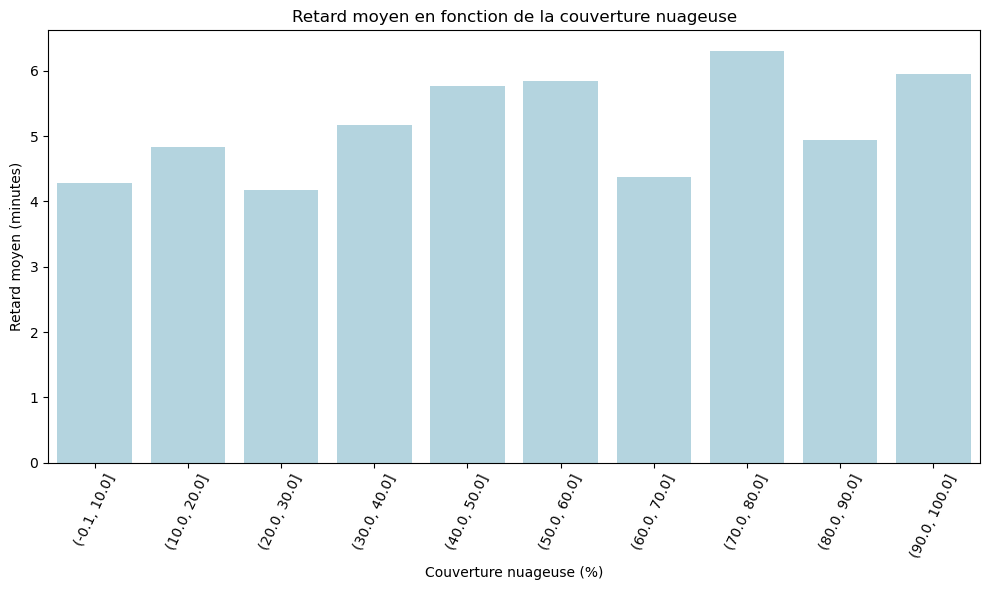

In [344]:
plt.figure(figsize=(10, 6))
sns.barplot(x='couv_nuag', y='Delay Carrier (Minutes)', data=stats_couv1, color='lightblue')
plt.xticks(rotation=65)
plt.title("Retard moyen en fonction de la couverture nuageuse")
plt.xlabel("Couverture nuageuse (%)")
plt.ylabel("Retard moyen (minutes)")
plt.tight_layout()
plt.show()